In [8]:
%matplotlib inline

import numpy as np
import os
import numpy.typing as npt
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
import json

In [10]:
GCA: dict[str, dict[int, int]] = {}
GCF: dict[str, dict[int, int]] = {}

with open("GCA.json", "r") as rf:
    GCA = json.load(rf)

with open("GCF.json", "r") as rf:
    GCF = json.load(rf)

In [11]:
# Sort a dictionary
GCA["1"] = {key: val for key, val in sorted(GCA["1"].items(), key = lambda n: int(n[0]))}

In [12]:
print(GCA["1"])
print(len(GCA["1"]))

print(GCF["1"])
print(len(GCF["1"]))

{'1': 76, '2': 10, '3': 2, '5': 1, '20': 1, '23': 1, '65': 1, '100': 57, '163': 1, '382': 1, '1601': 1, '1602': 1, '2236': 1, '2891': 1, '10000': 2, '43509': 1, '50000': 9, '18000000': 1}
18
{'10000': 2, '50000': 9, '43509': 1, '1602': 1, '1': 76, '3': 2, '5': 1, '2': 10, '100': 57, '382': 1, '163': 1, '23': 1, '65': 1, '20': 1, '1601': 1, '2236': 1, '18000000': 1, '2891': 1}
18


In [13]:
graphs_dir = 'graphs'
os.makedirs(graphs_dir, exist_ok=True)
collage_path = os.path.join(graphs_dir, "all.png")

/tmp/ipykernel_2038/2644601819.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, max(6, len(sorted_counts) * 0.2)))


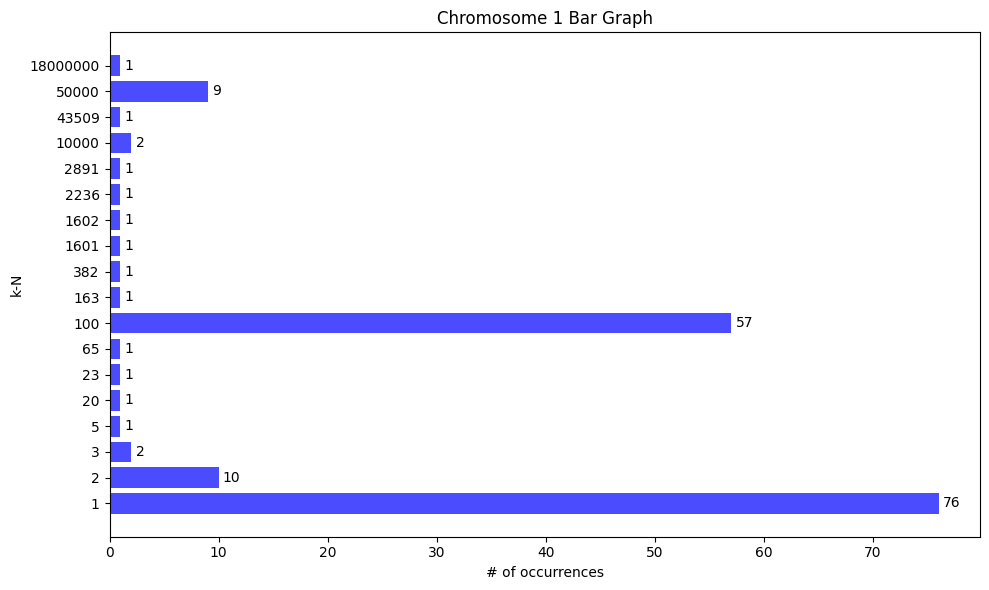

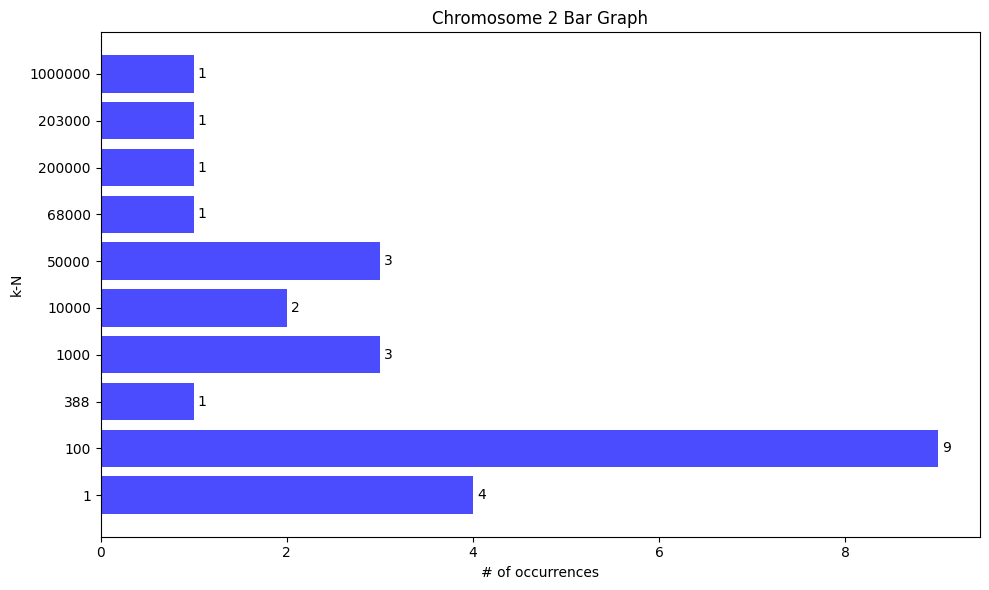

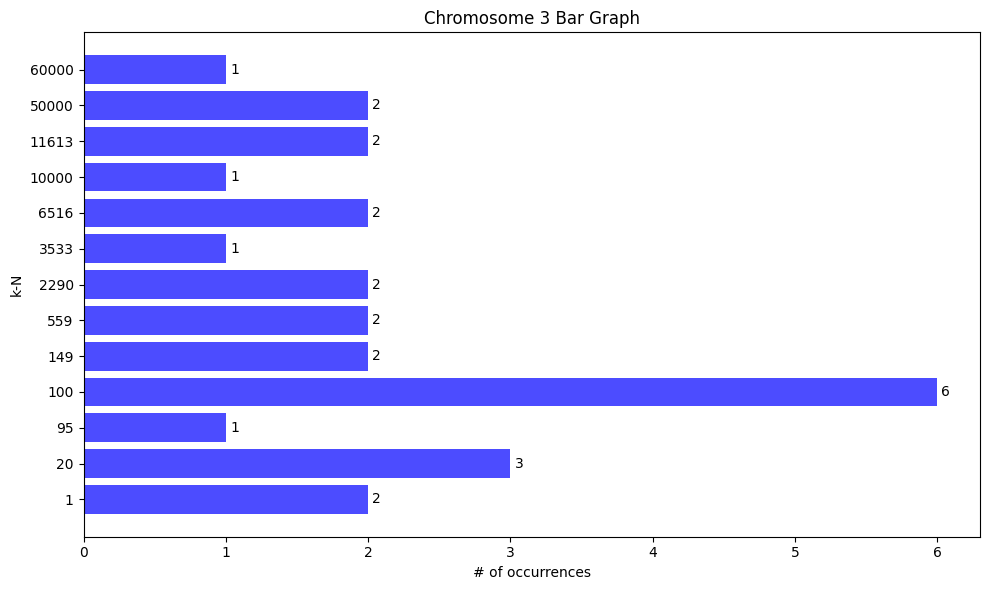

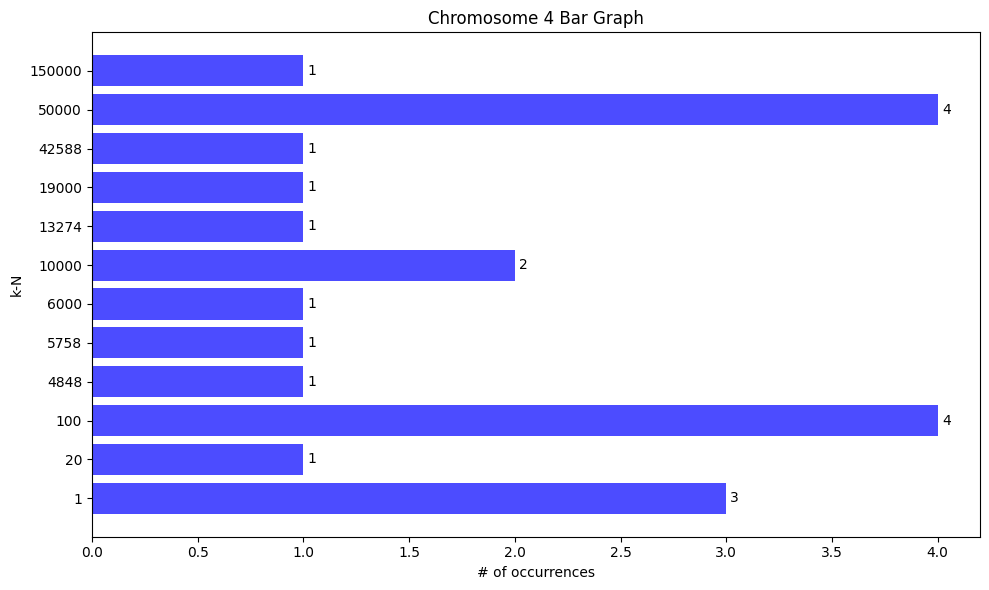

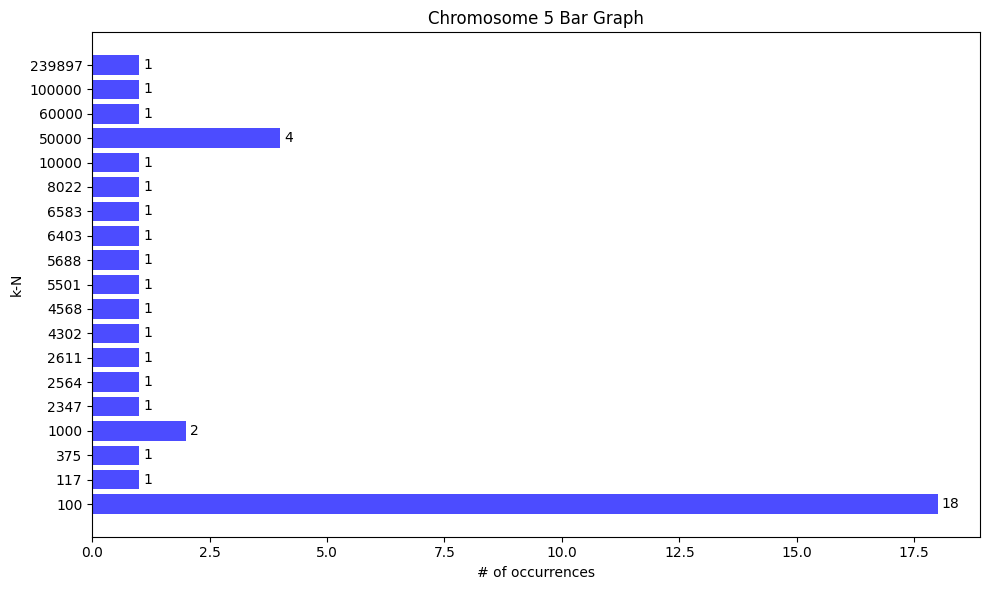

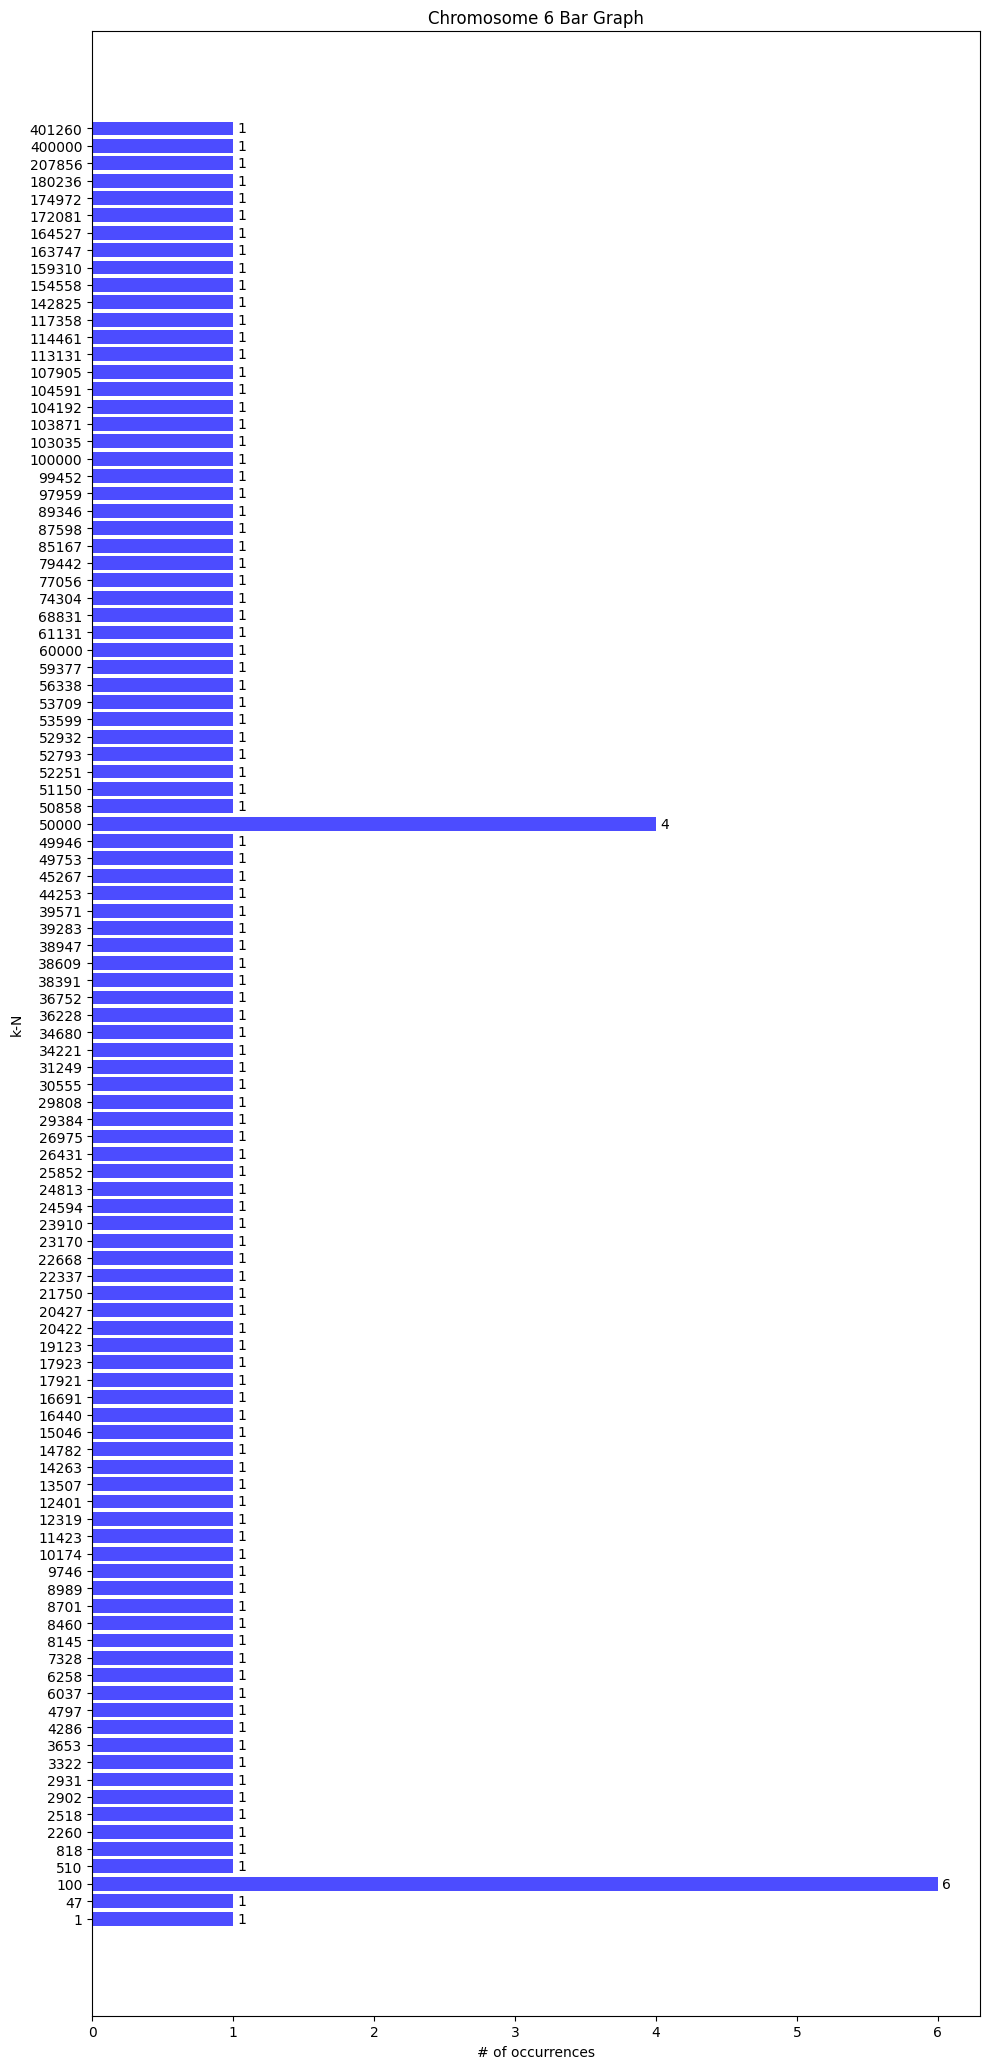

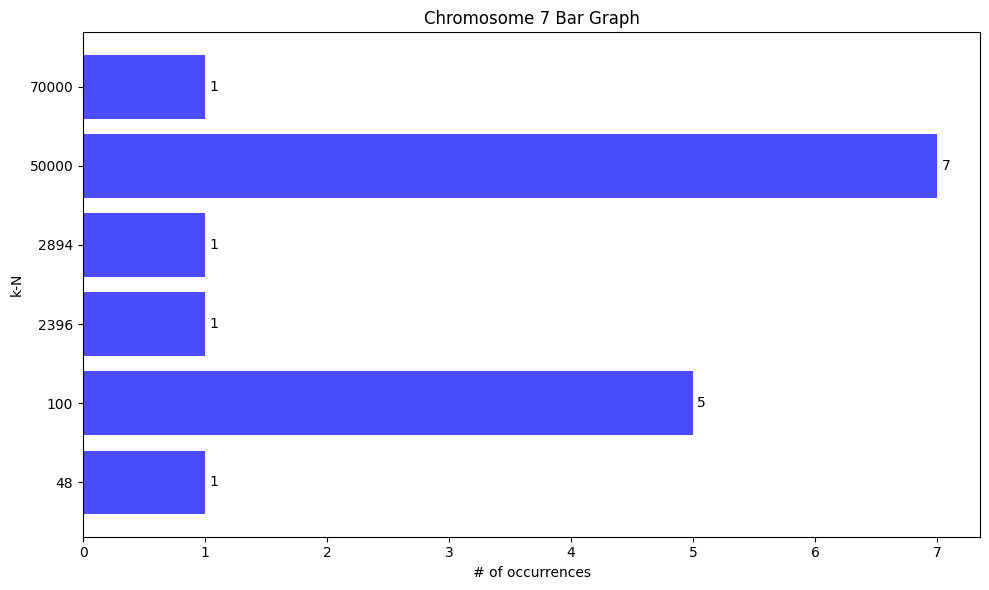

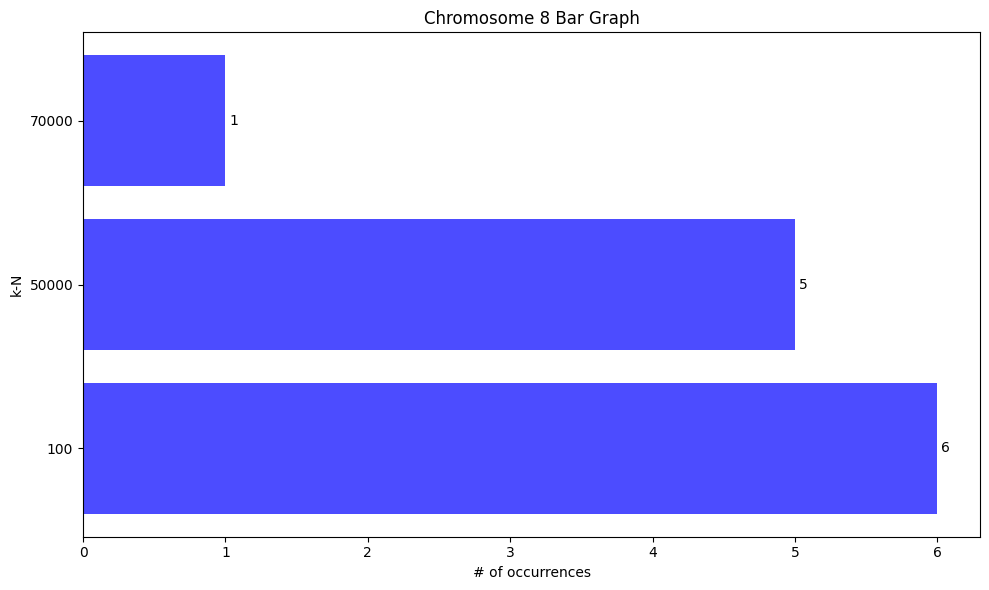

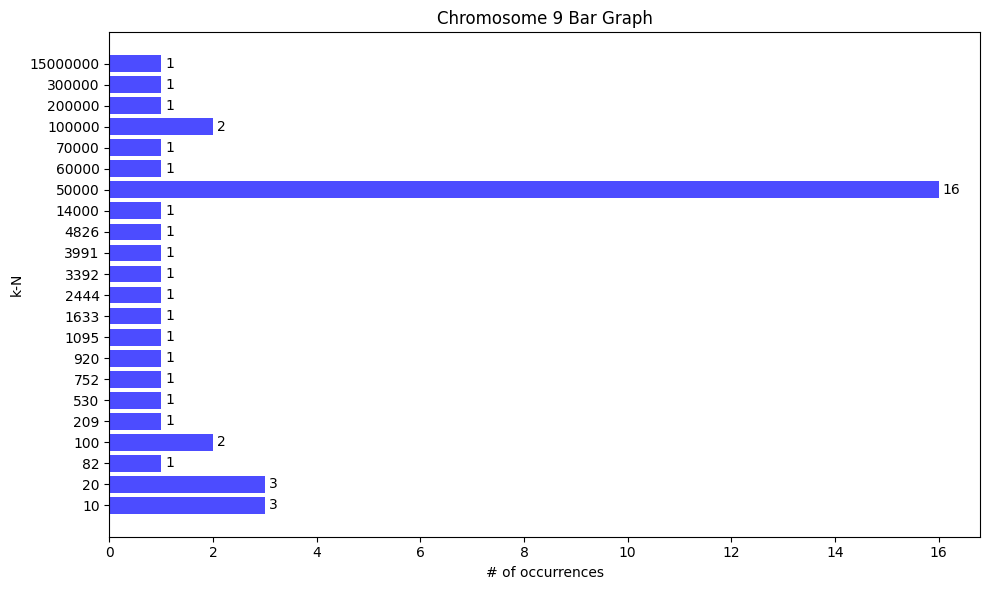

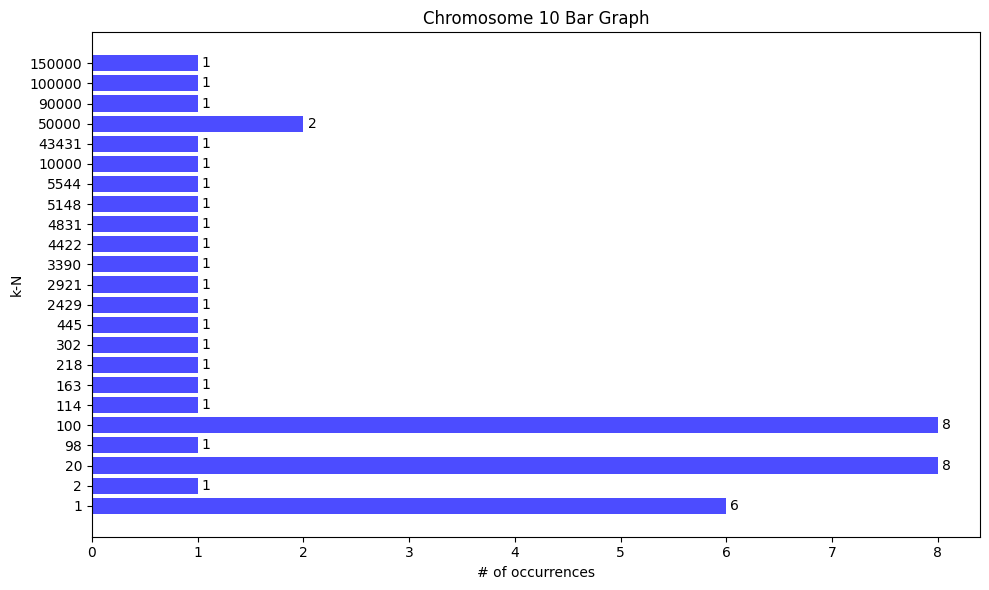

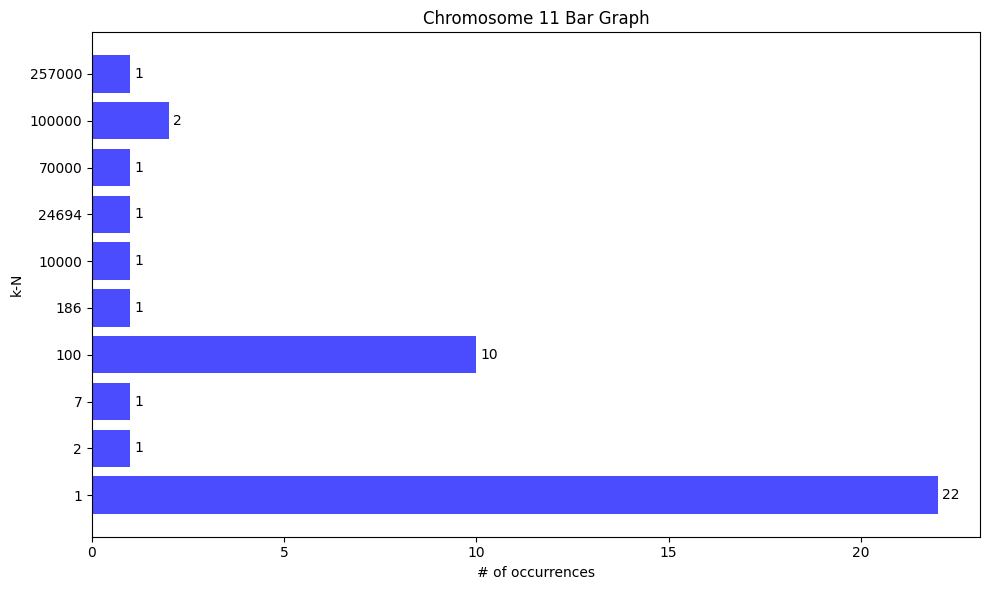

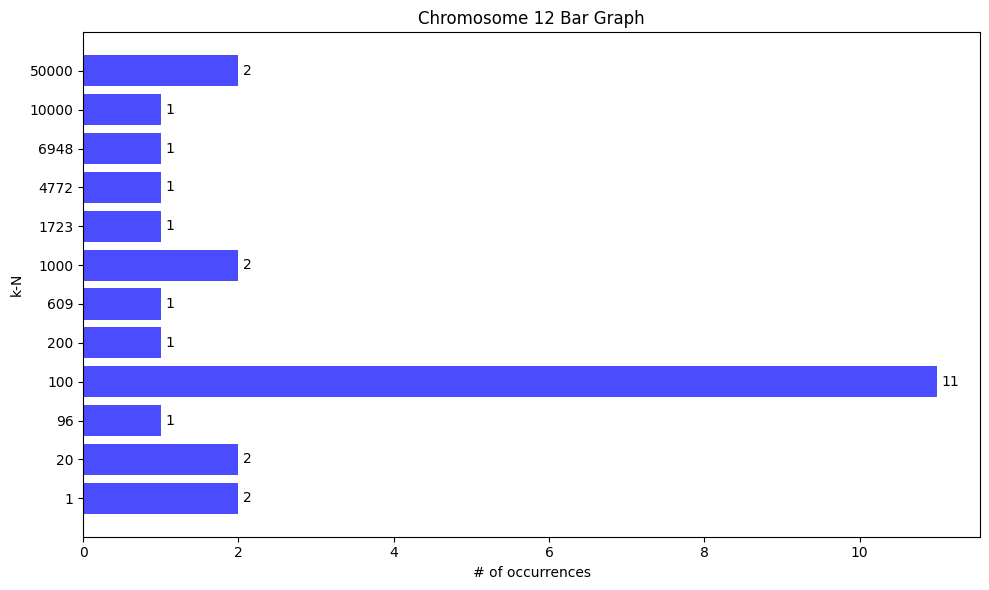

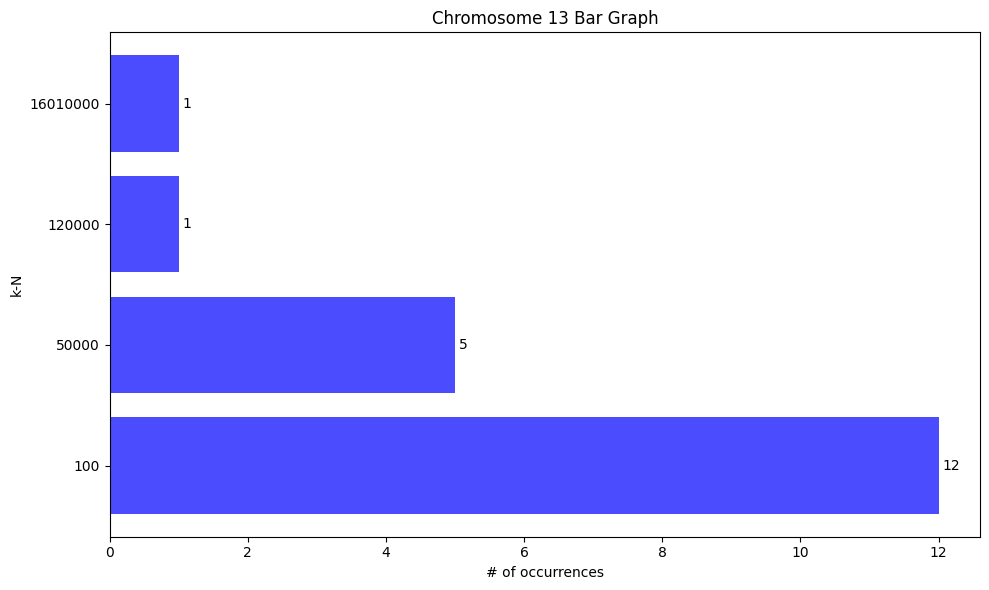

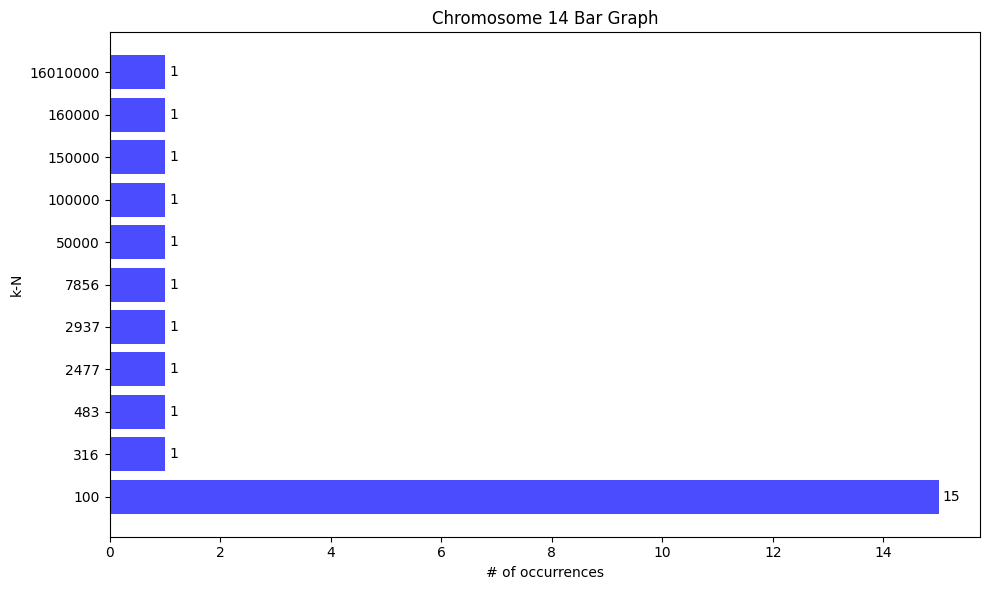

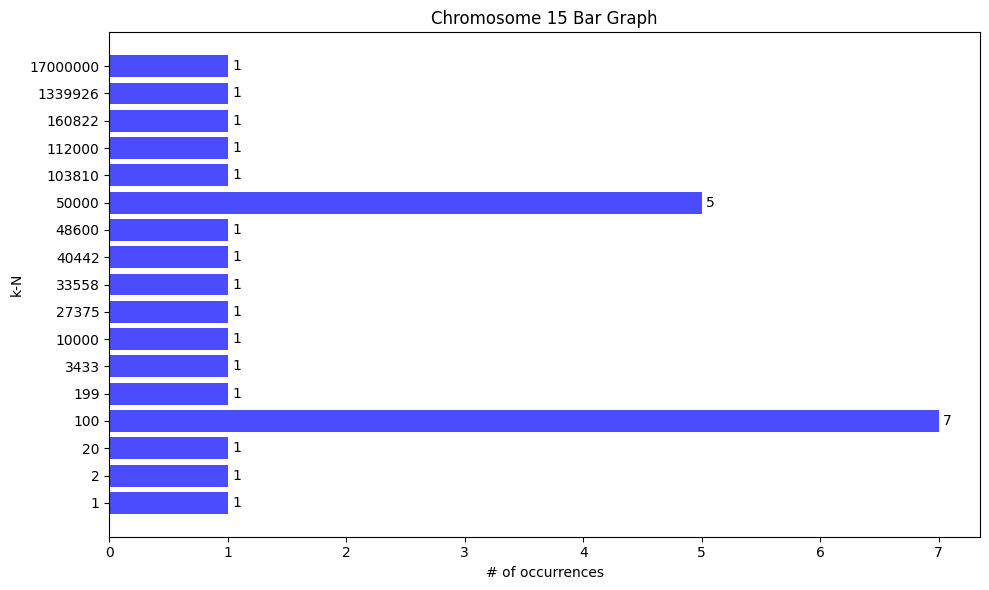

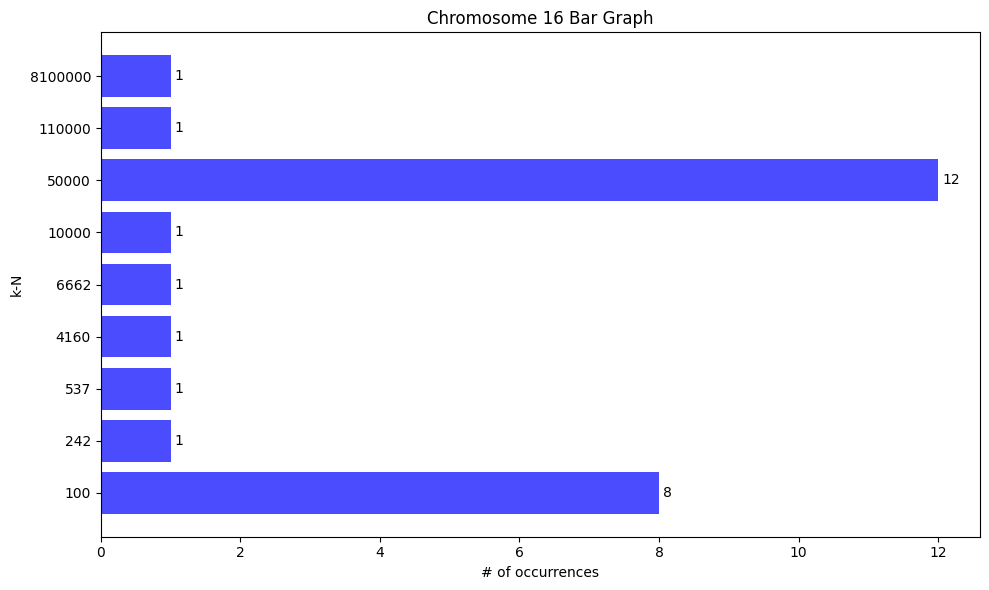

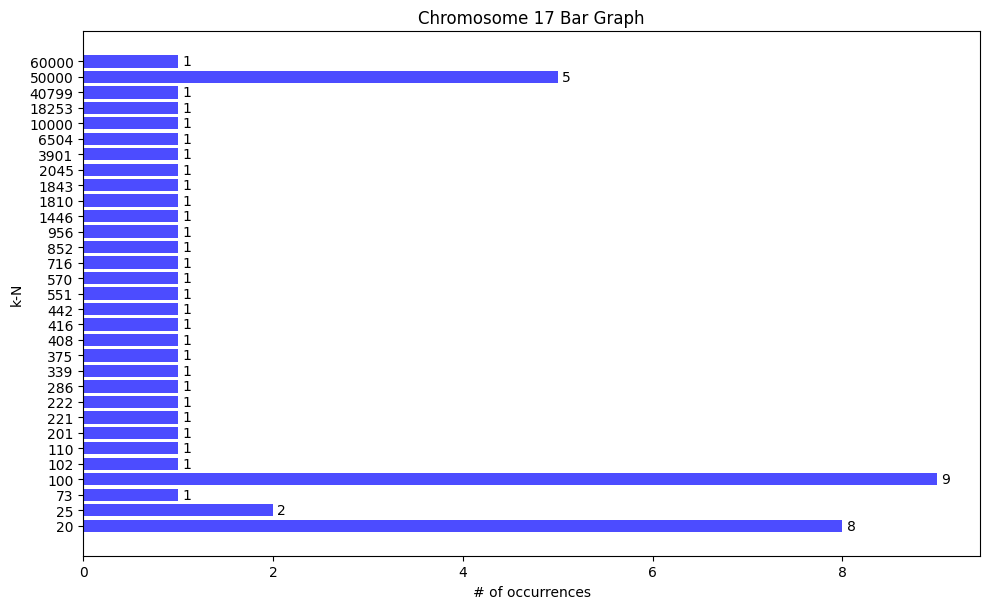

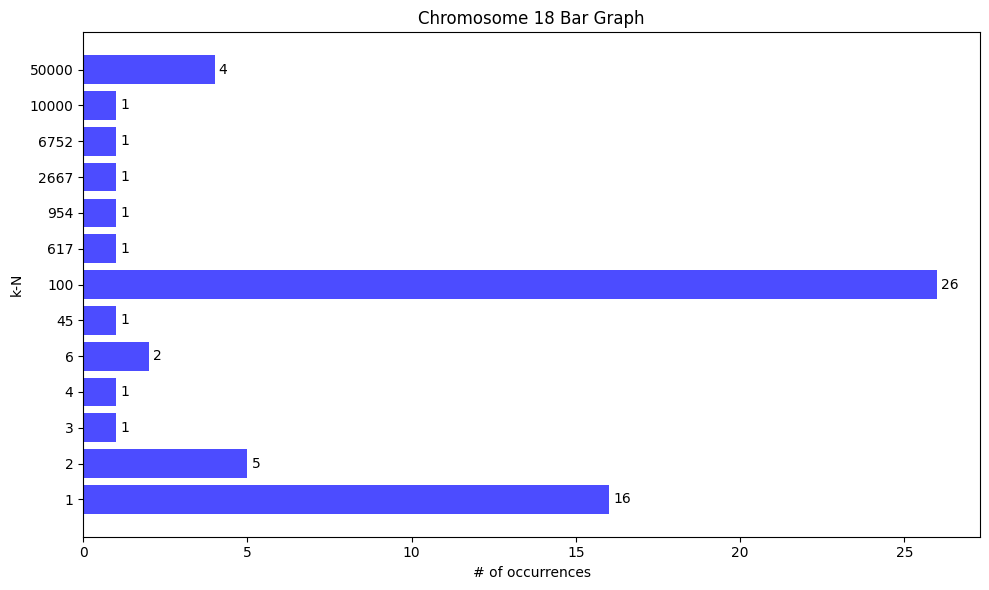

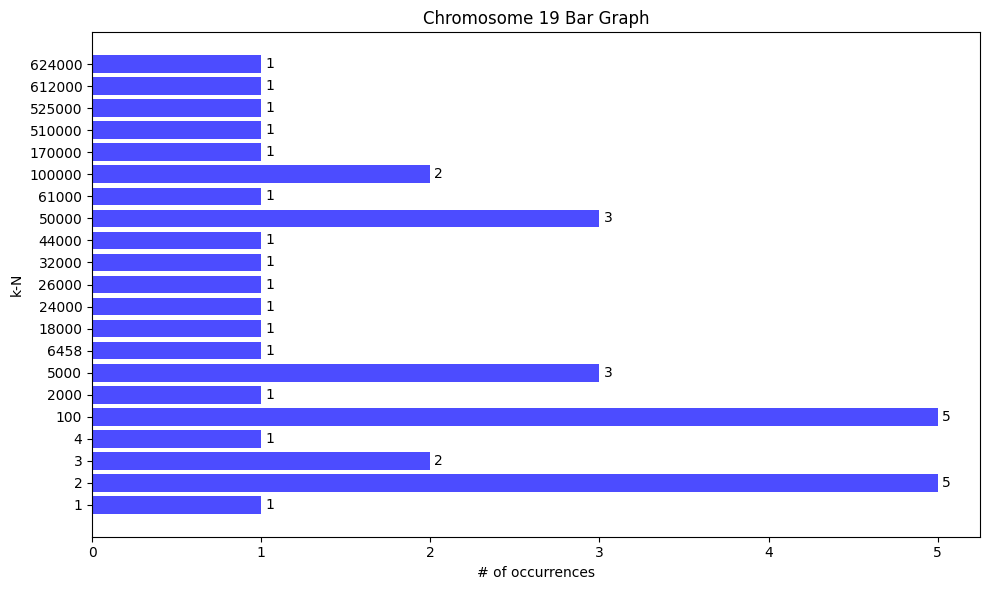

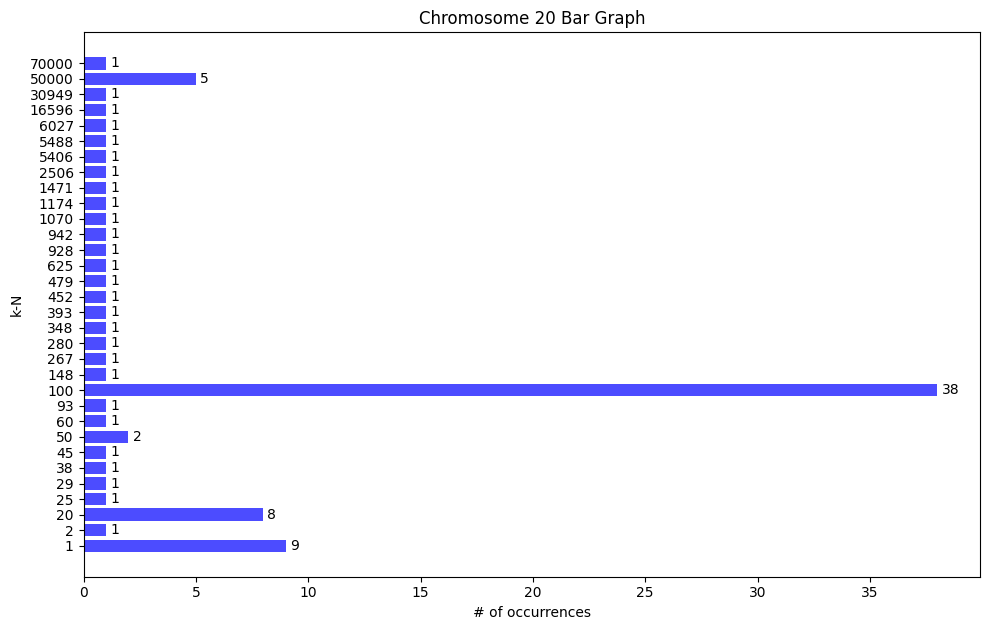

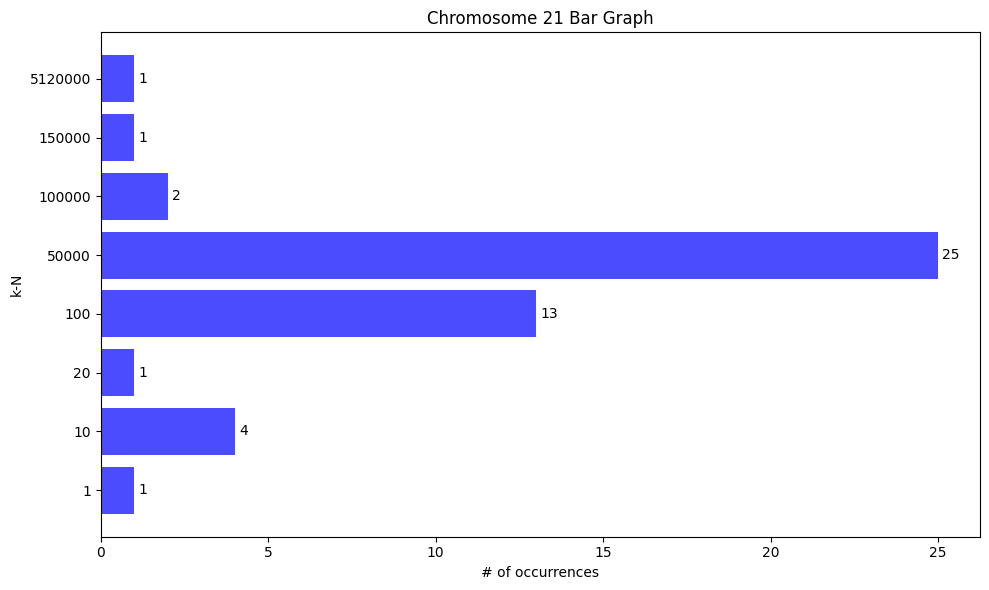

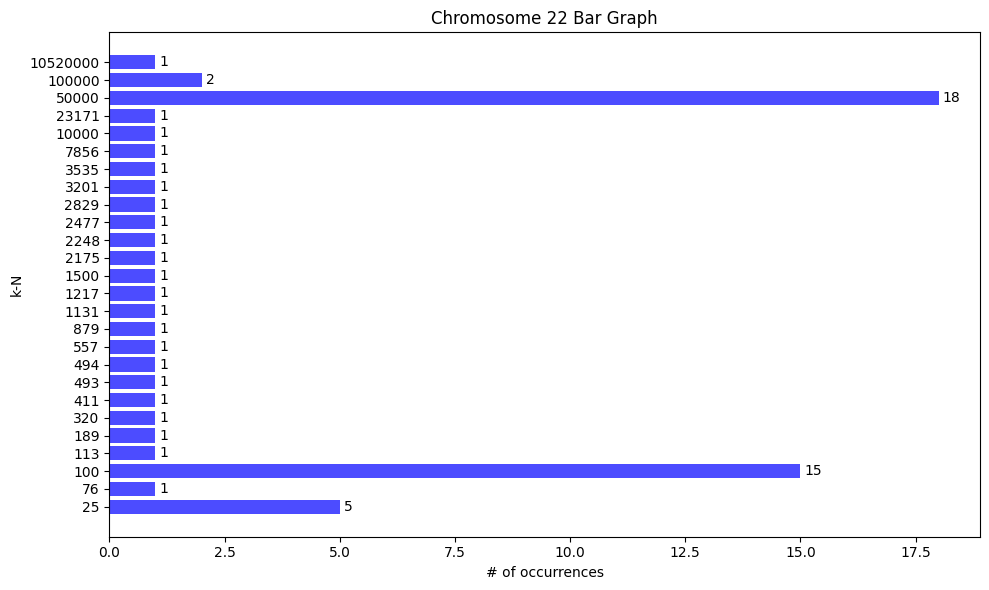

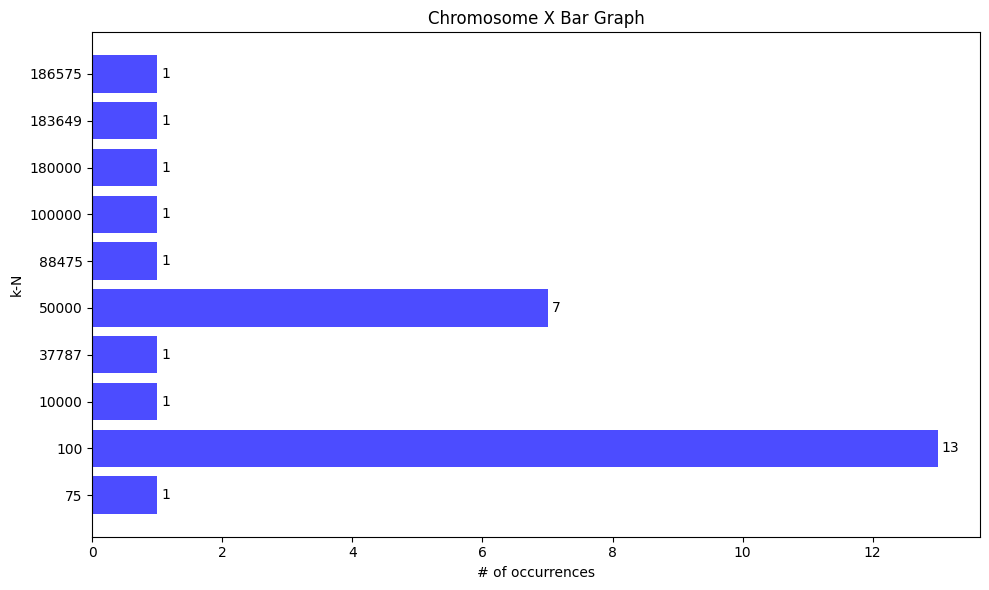

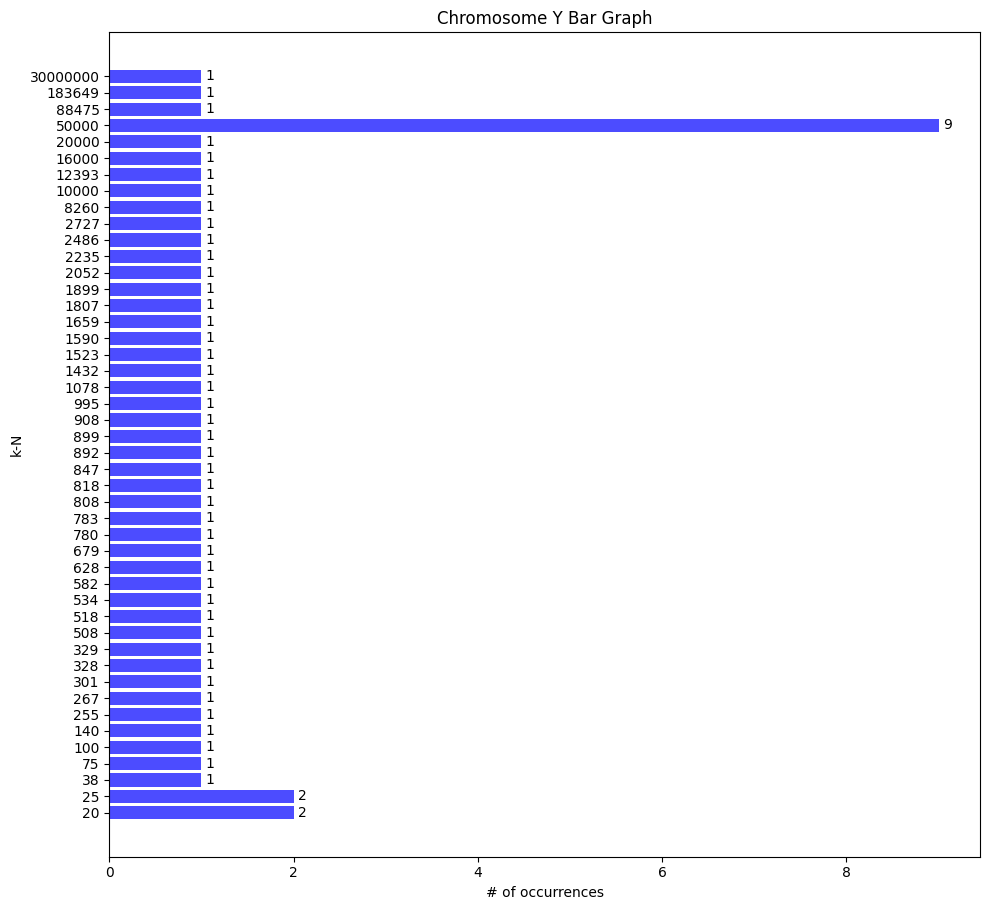

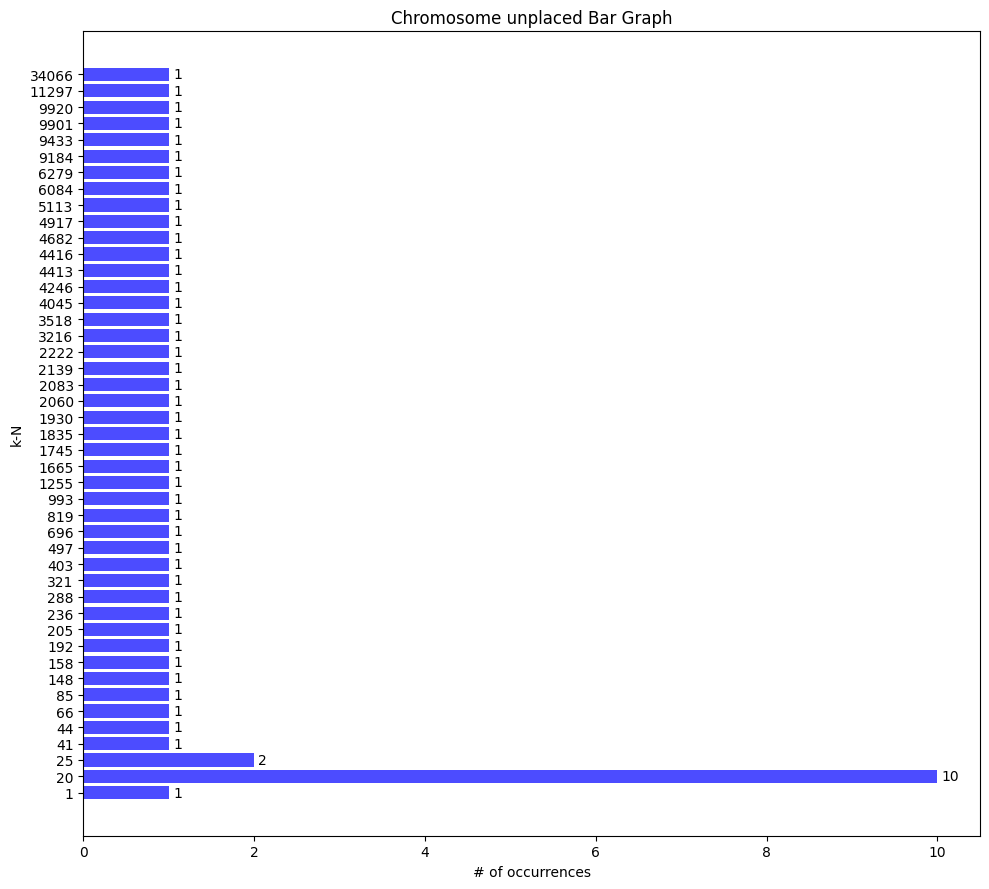

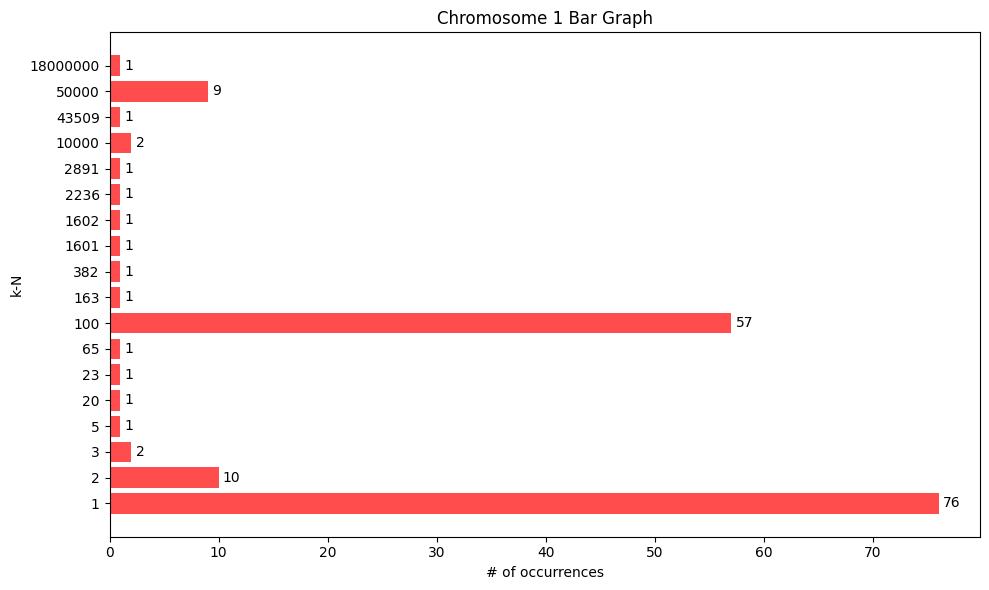

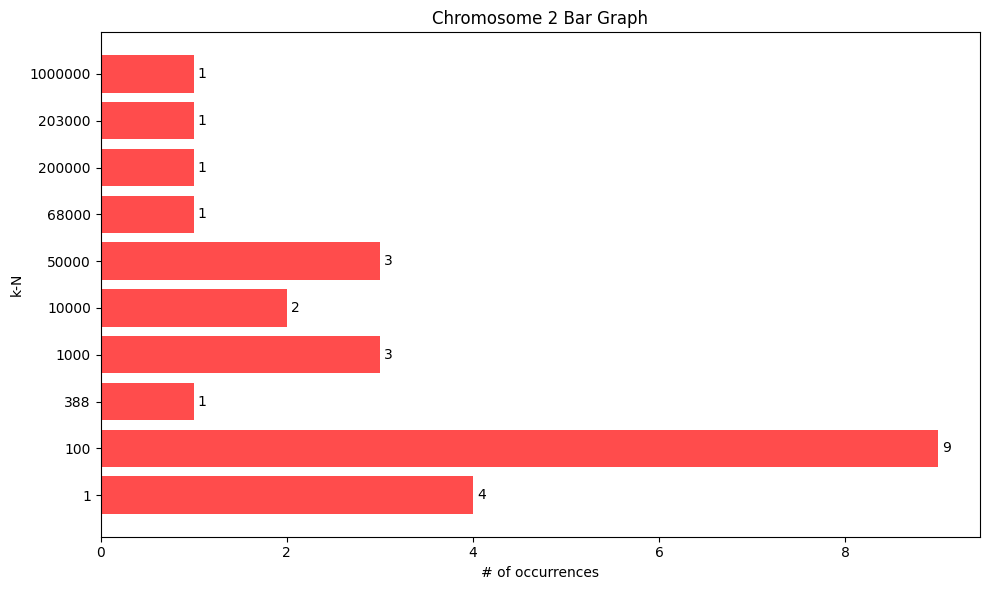

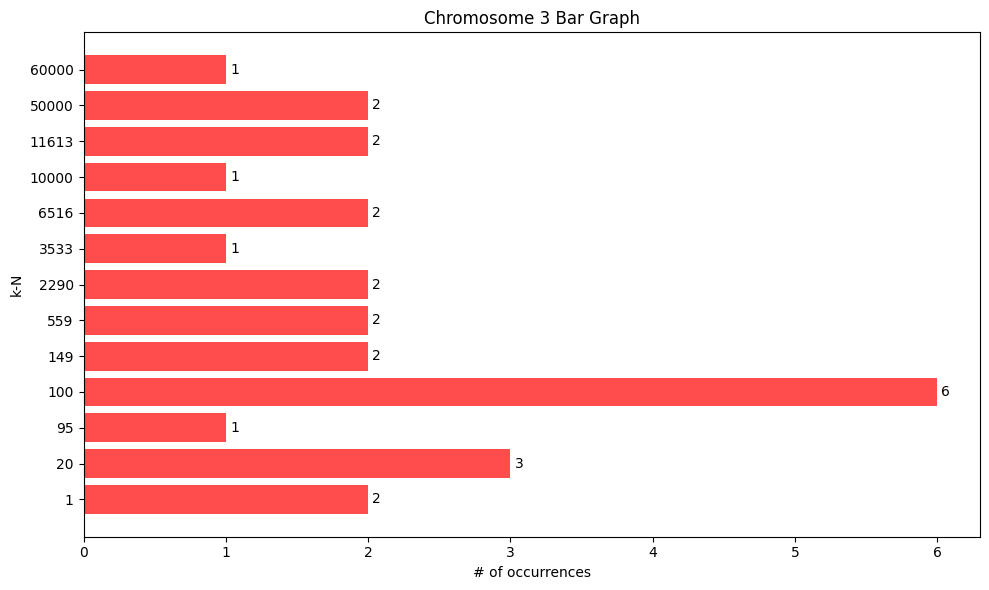

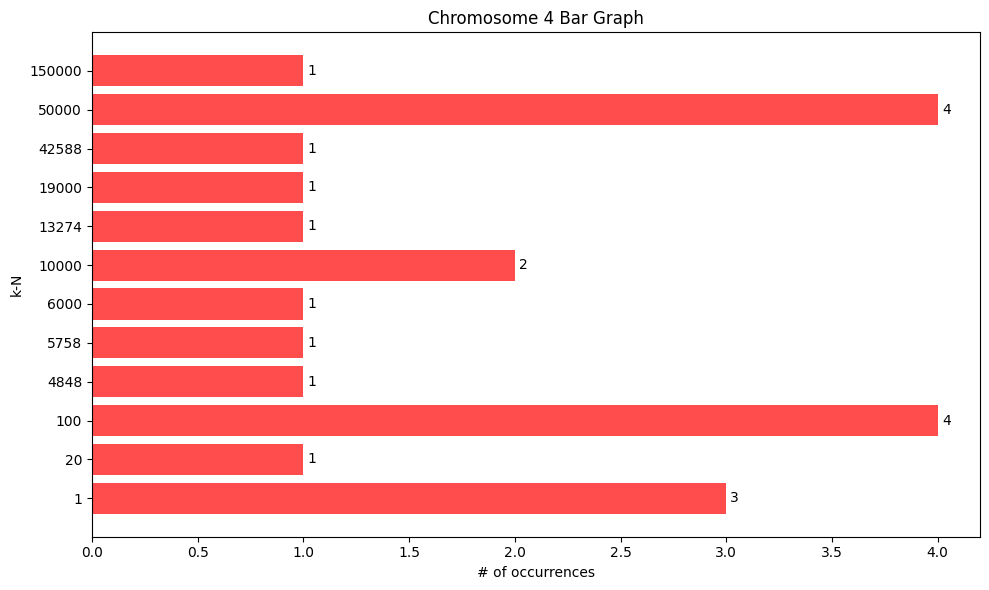

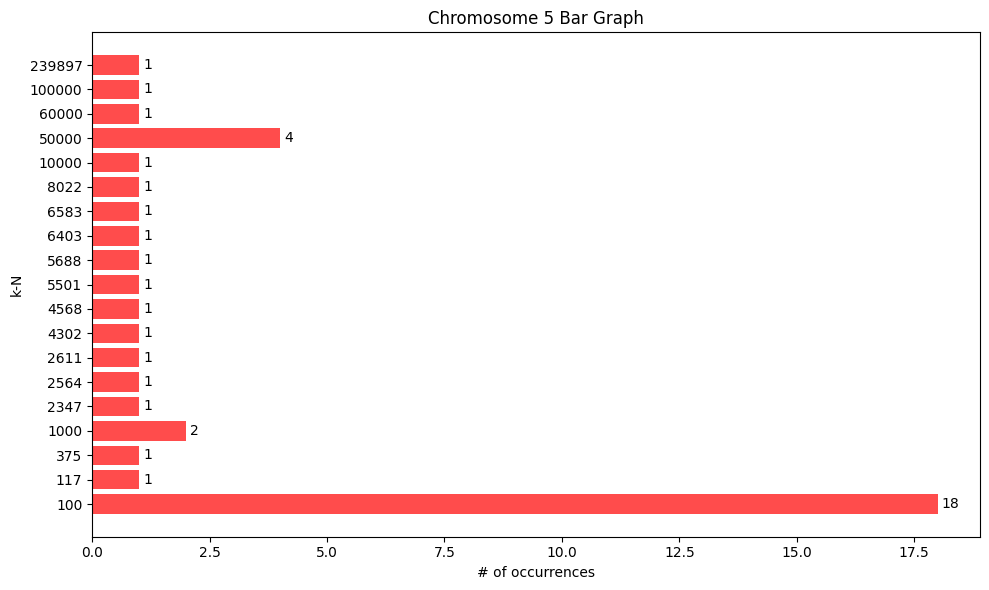

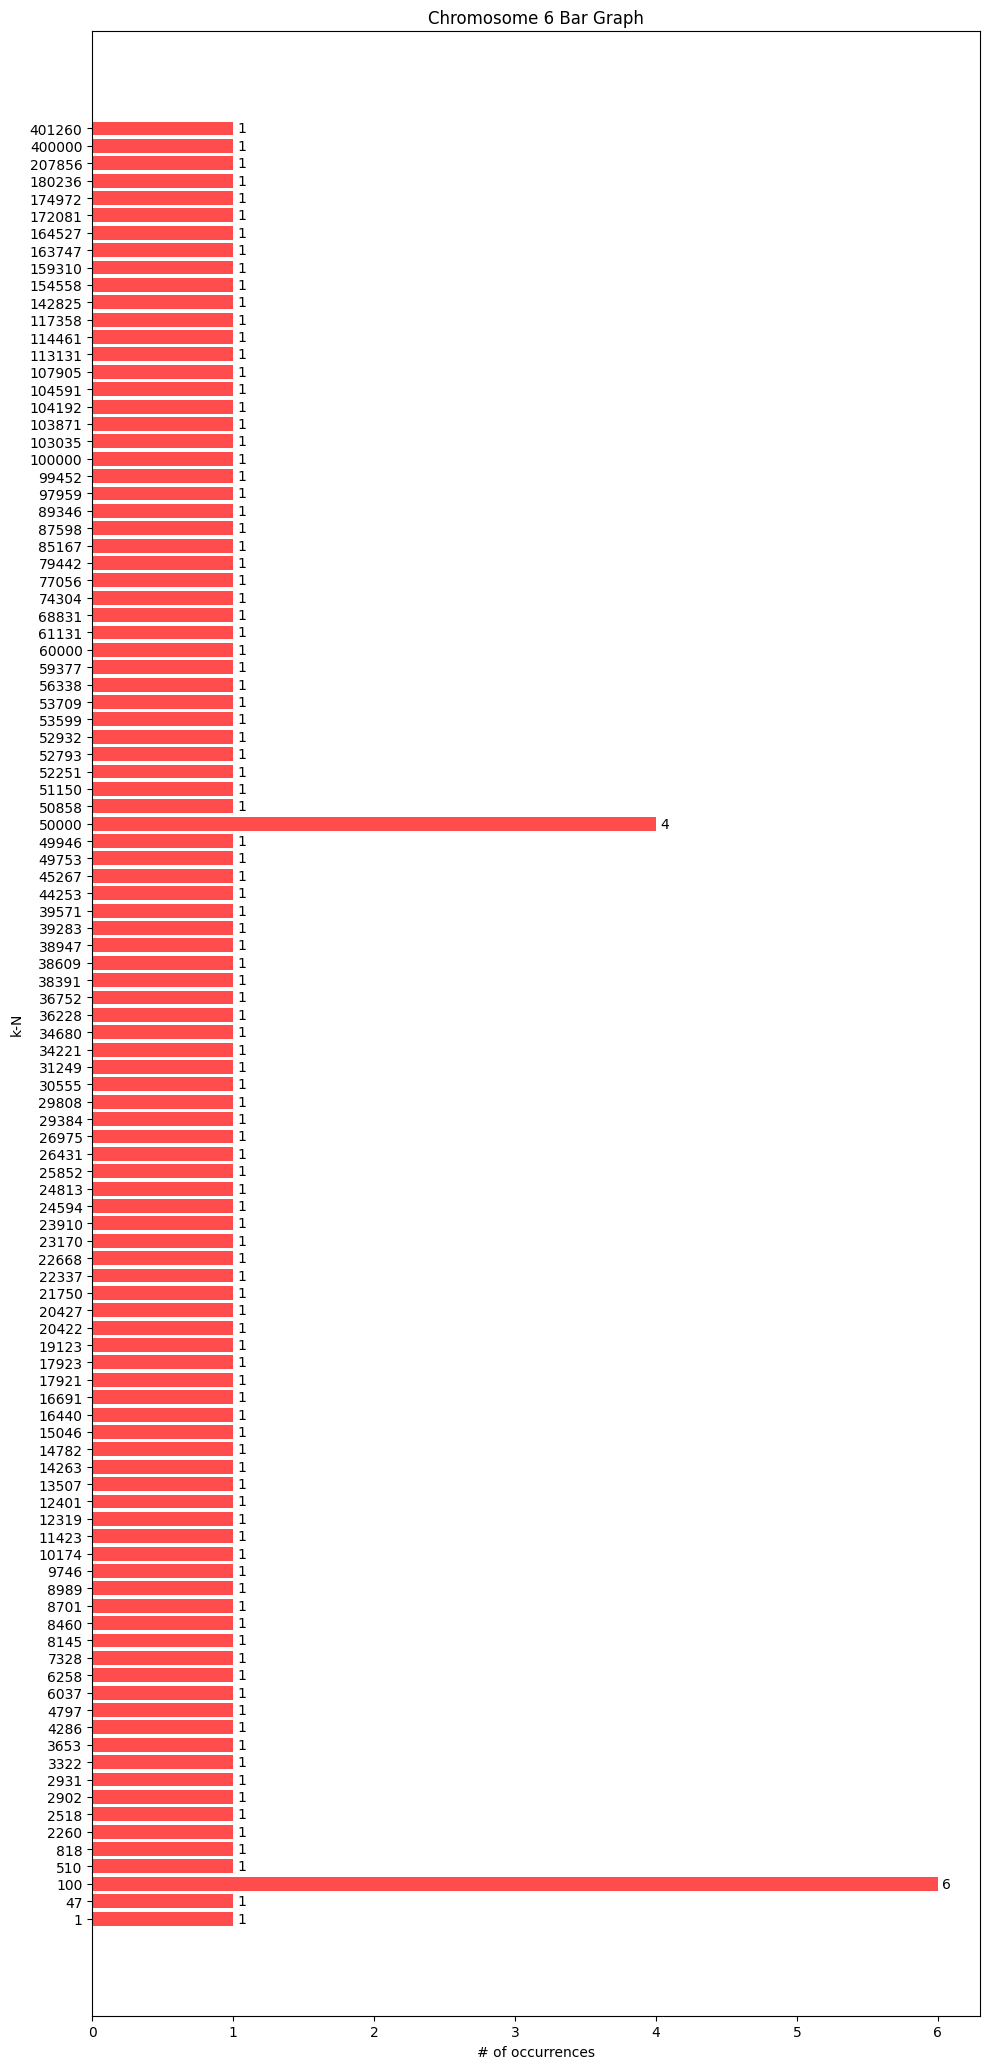

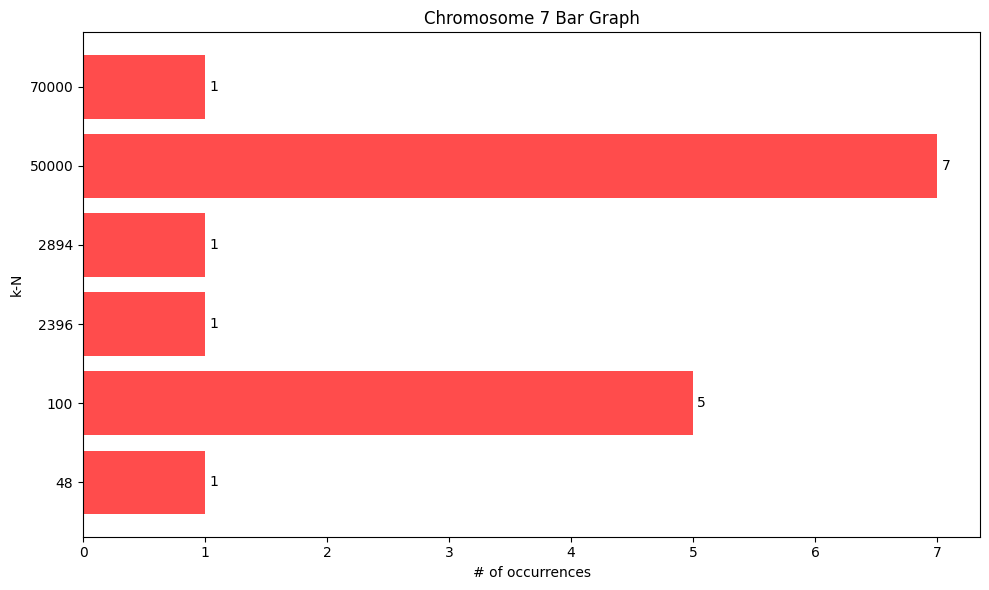

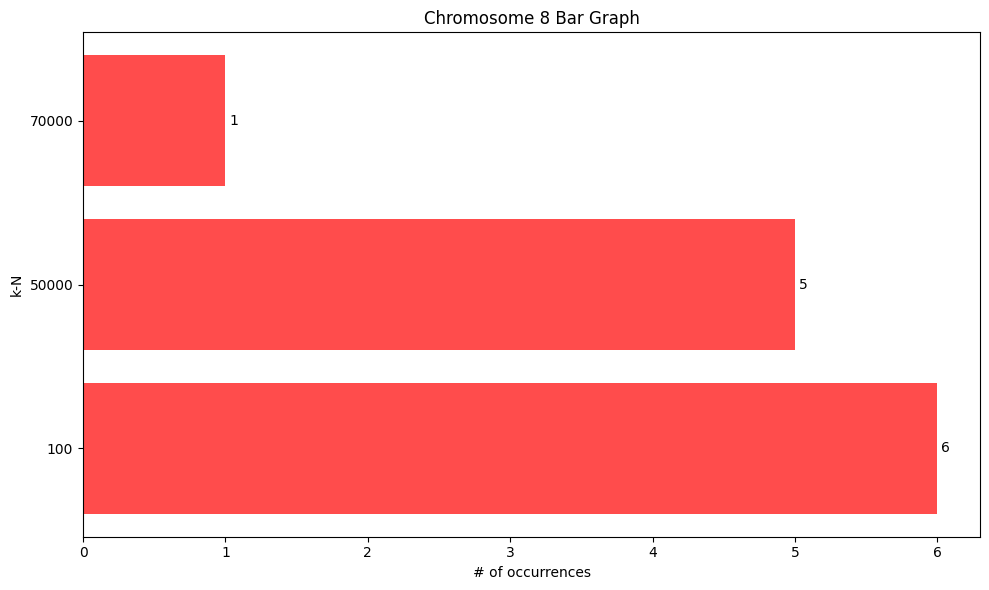

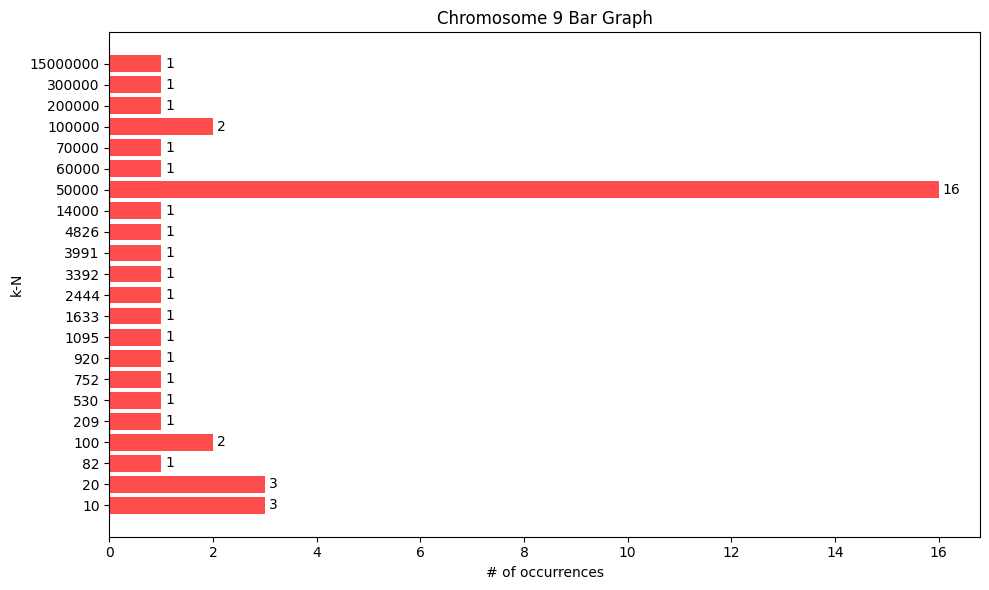

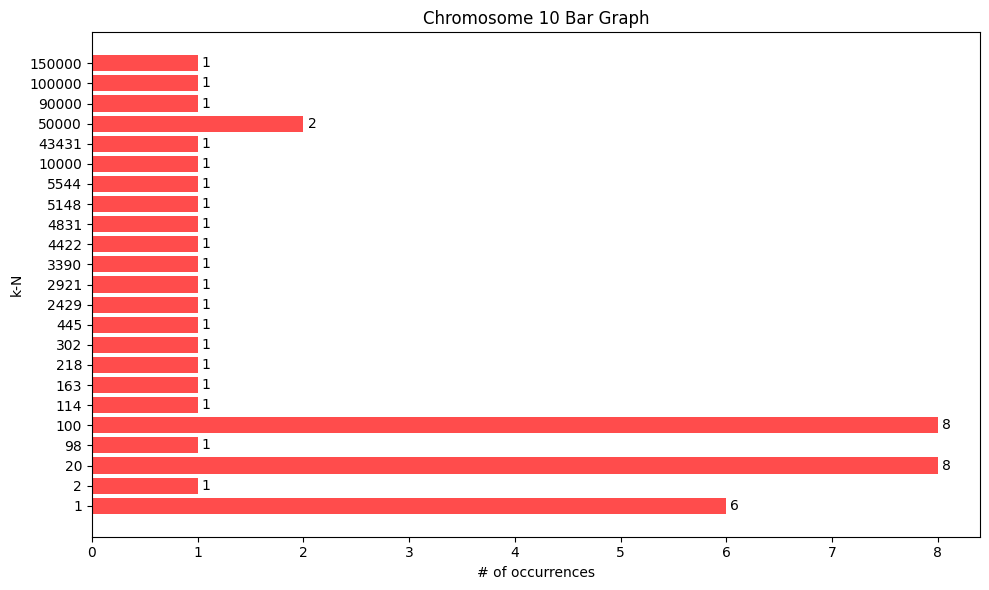

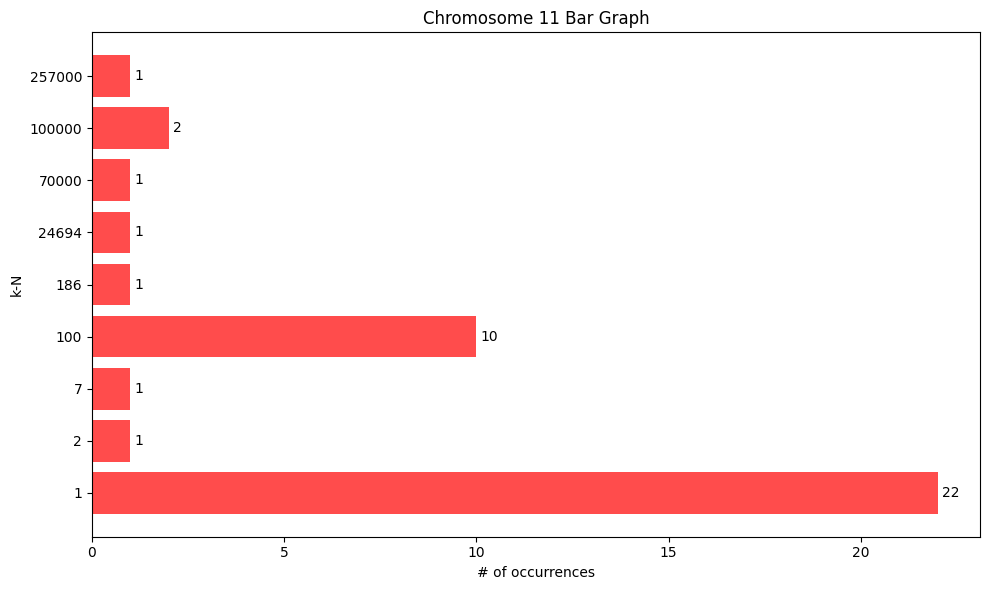

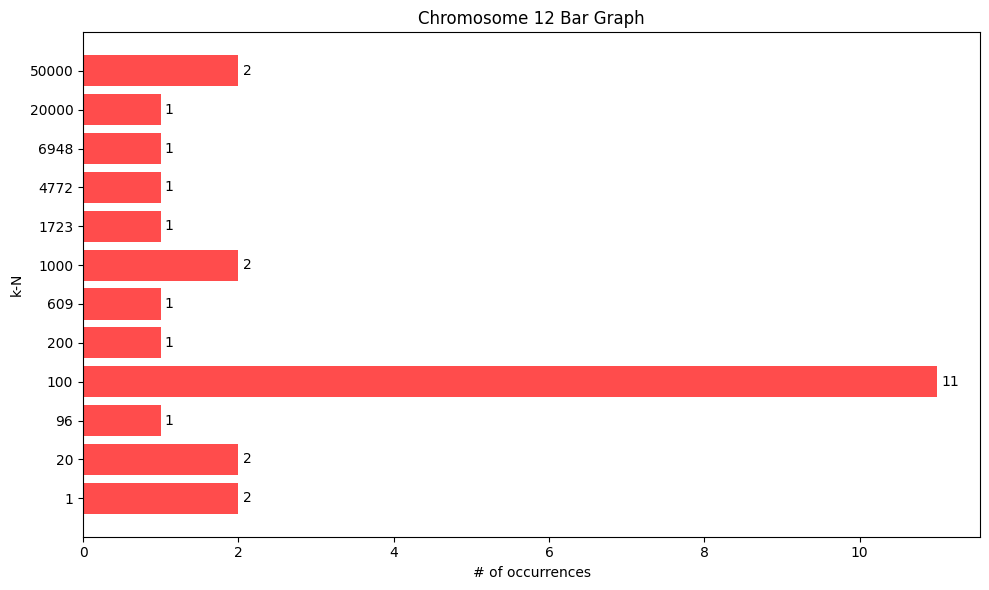

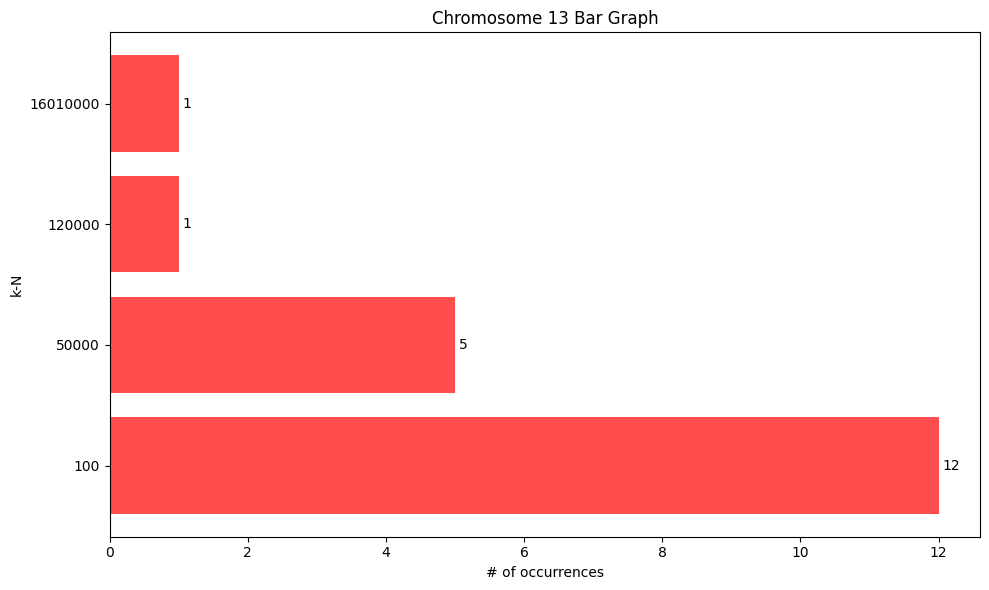

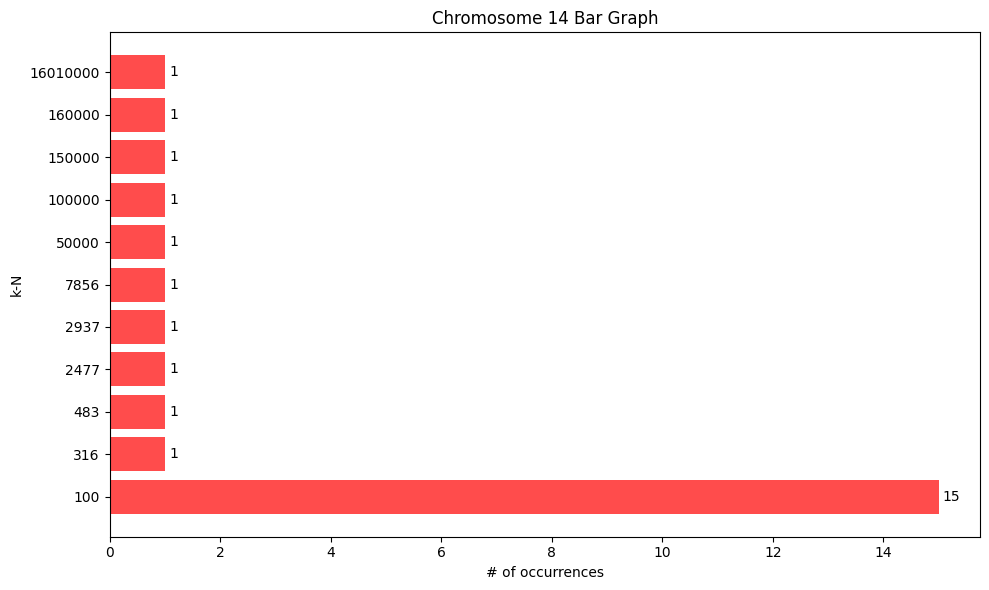

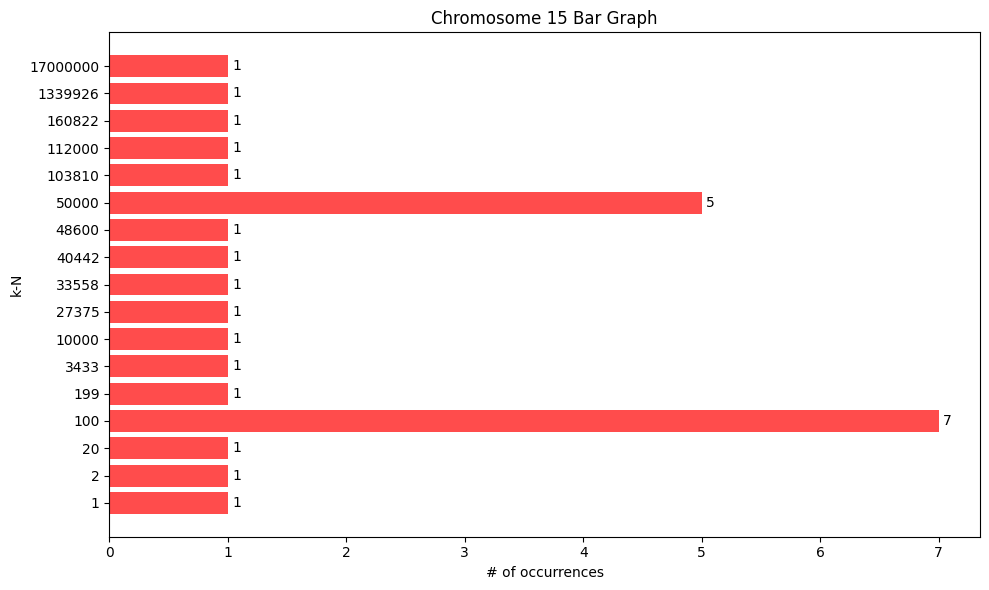

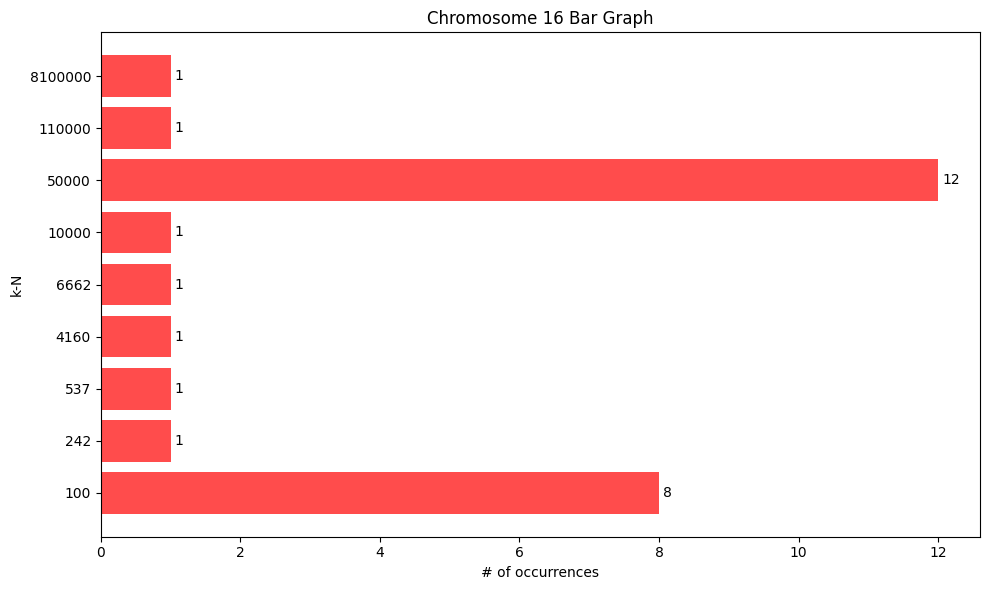

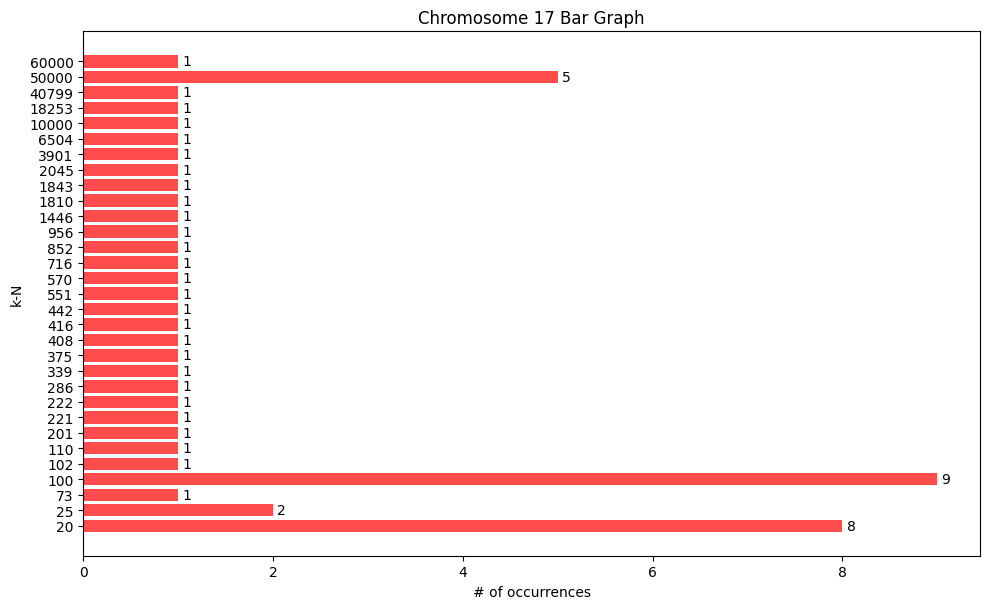

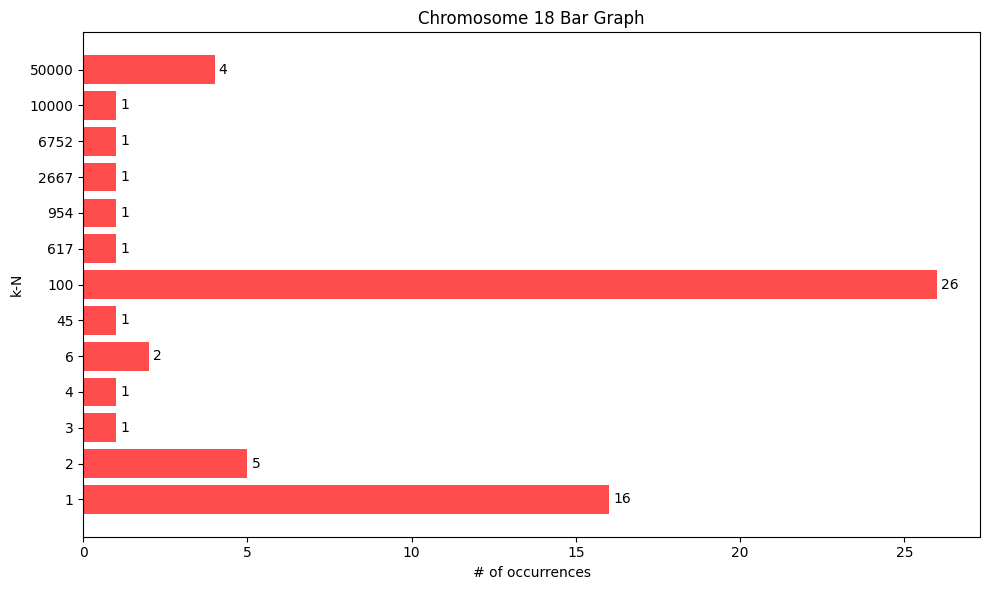

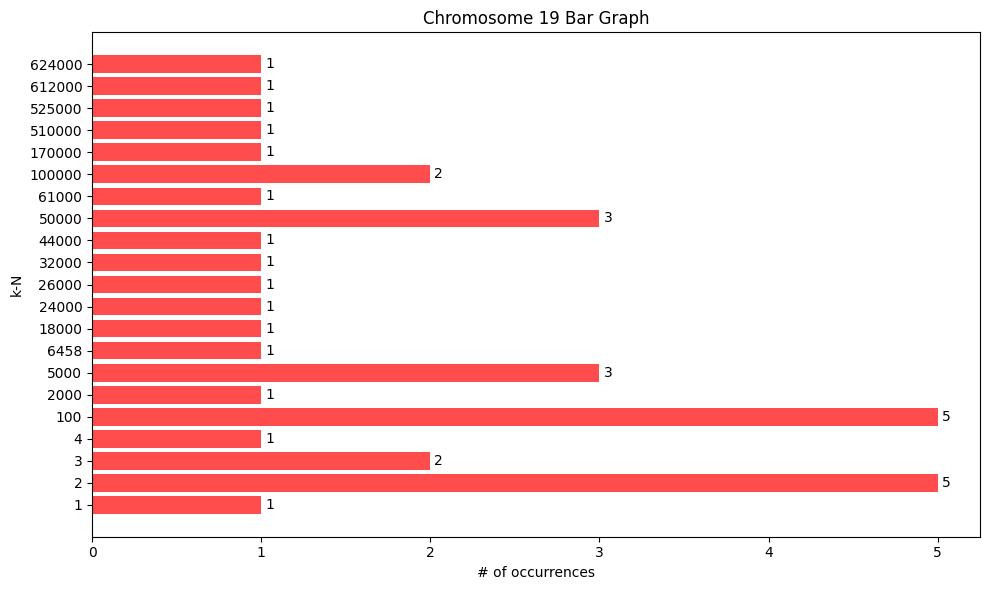

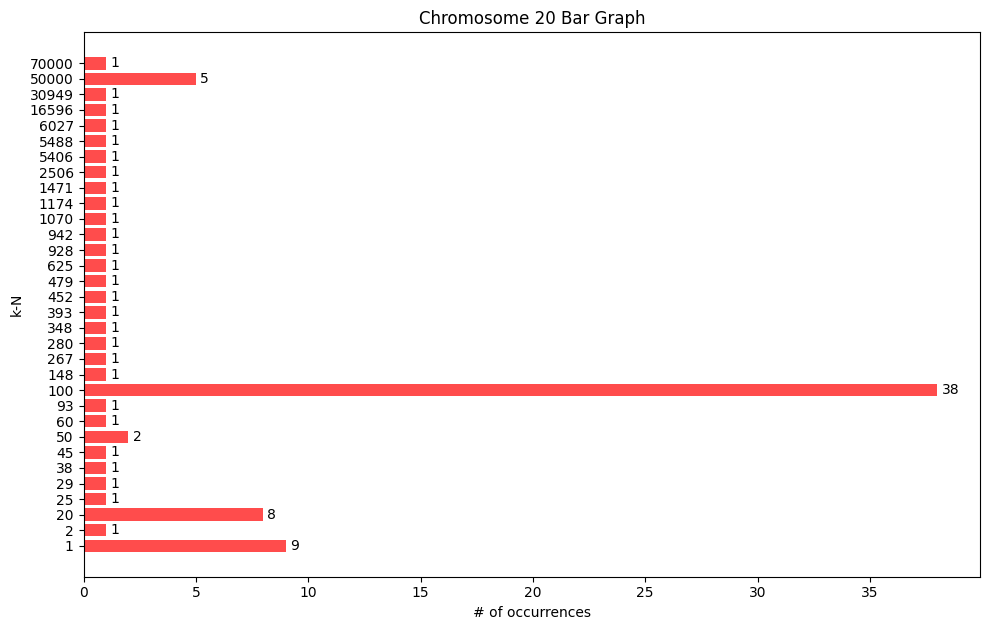

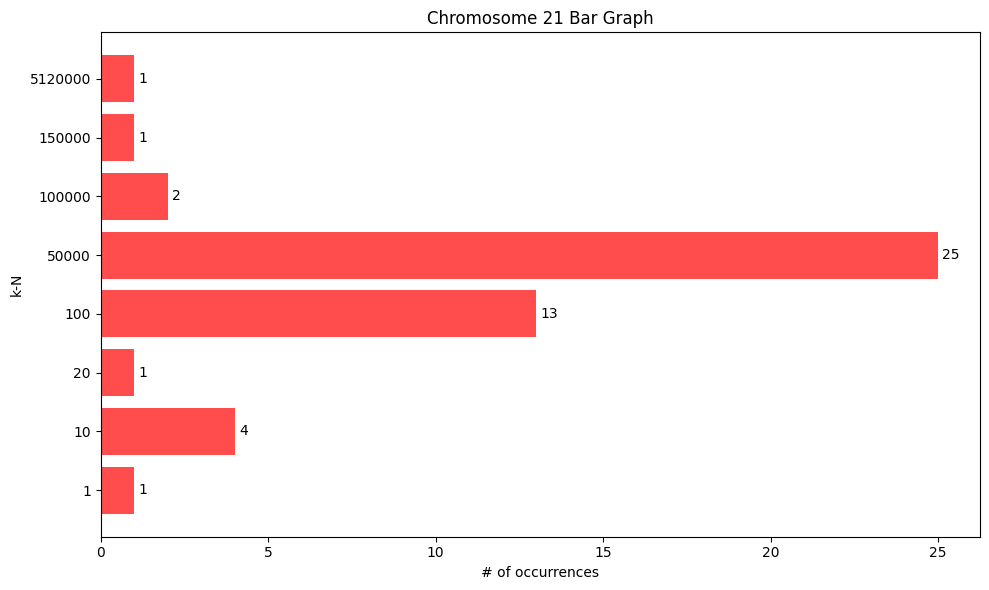

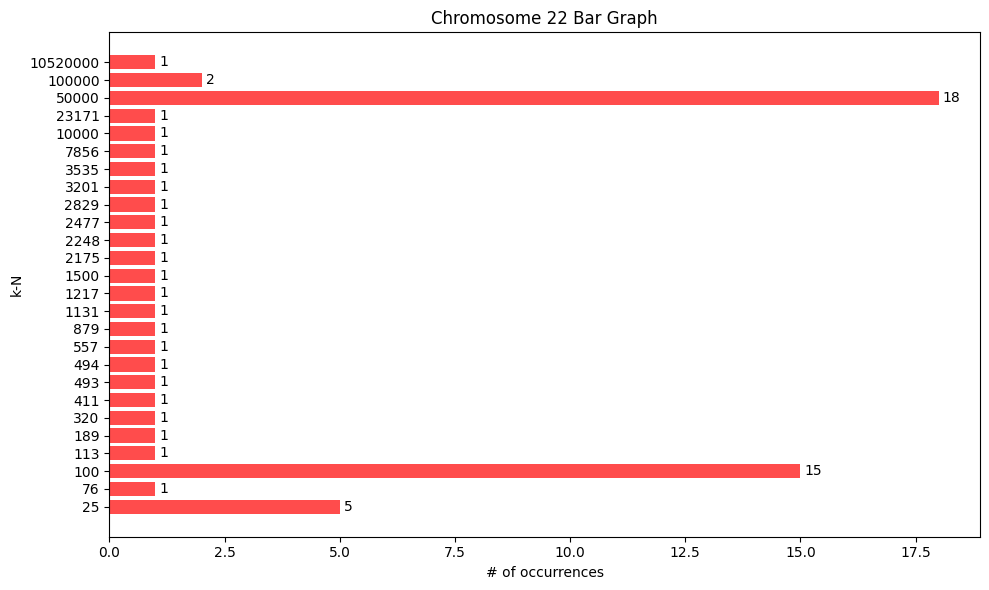

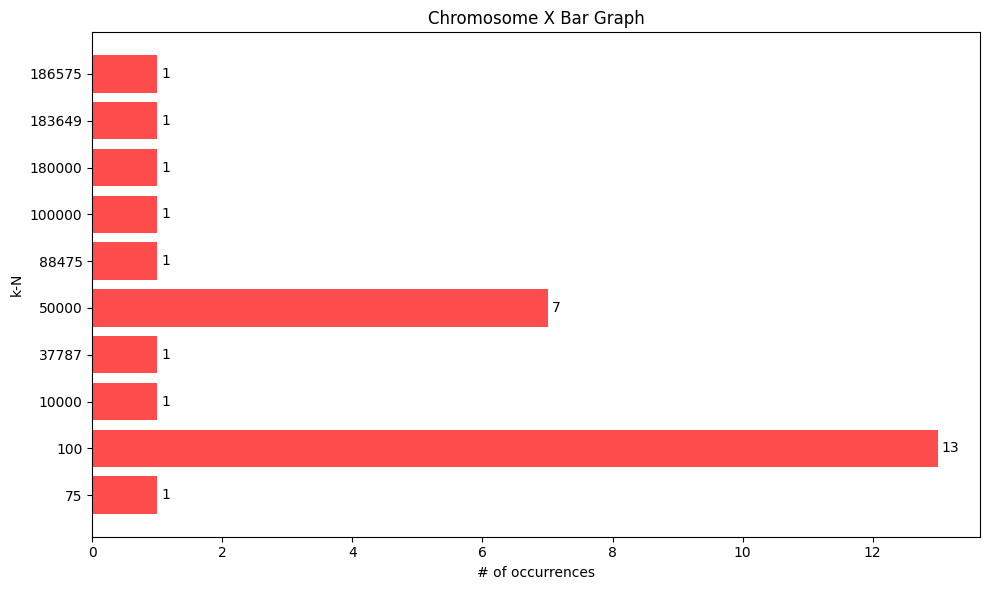

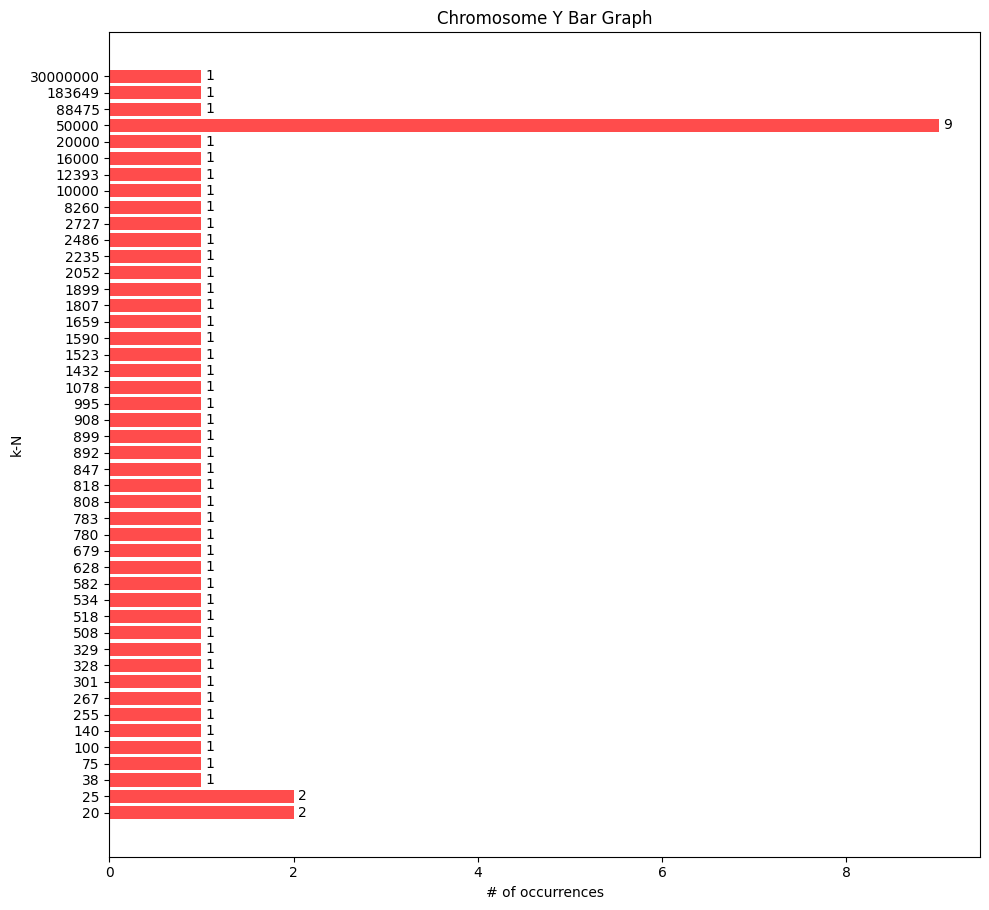

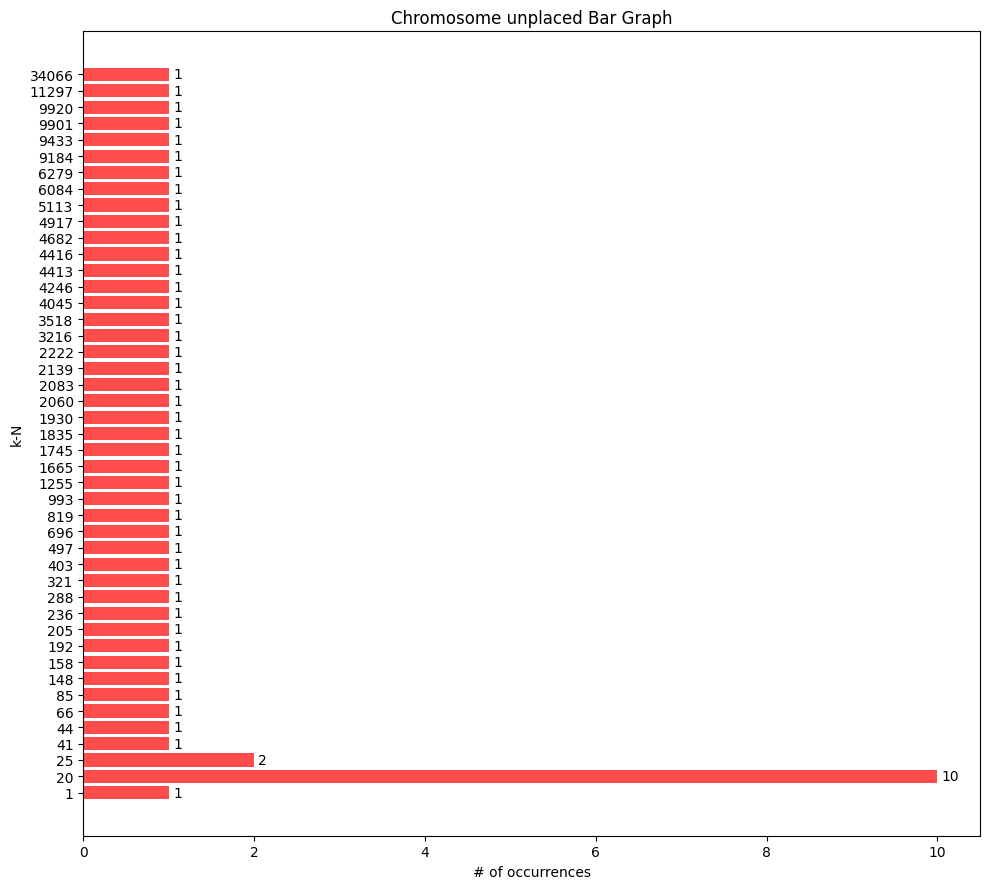

In [14]:
for chromosome, counts in GCA.items():
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: int(item[0]))}

    fig, ax = plt.subplots(figsize=(10, max(6, len(sorted_counts) * 0.2)))
    bars = ax.barh(list(sorted_counts.keys()), list(sorted_counts.values()), color='blue', alpha=0.7)
    ax.set_xlabel('# of occurrences')
    ax.set_ylabel('k-N')
    ax.set_title(f'Chromosome {chromosome} Bar Graph')
    
    ax.bar_label(bars, padding=3, fontsize=10)
    plt.tight_layout()
    plt.savefig(os.path.join(graphs_dir, f'chromosome_{chromosome}_graph.png'), dpi=300)

    #plt.show()

for chromosome, counts in GCF.items():
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: int(item[0]))}

    fig, ax = plt.subplots(figsize=(10, max(6, len(sorted_counts) * 0.2)))
    bars = ax.barh(list(sorted_counts.keys()), list(sorted_counts.values()), color='red', alpha=0.7)
    ax.set_xlabel('# of occurrences')
    ax.set_ylabel('k-N')
    ax.set_title(f'Chromosome {chromosome} Bar Graph')
    
    ax.bar_label(bars, padding=3, fontsize=10)
    plt.tight_layout()
    plt.savefig(os.path.join(graphs_dir, f'chromosome_GCF_{chromosome}_graph.png'), dpi=300)

    #plt.show()

In [15]:
#collage 
if os.path.exists(collage_path):
    os.remove(collage_path)

image_files = [os.path.join(graphs_dir, f) for f in os.listdir(graphs_dir) if f.endswith('.png')]

sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: int(item[0]))}

images = [Image.open(img_file) for img_file in image_files]
num_images = len(images)

cols = 3  
rows = (num_images + cols - 1) // cols  # calculates the row based on image #
img_width, img_height = images[0].size

# creates a blank collage canvas
collage_width = cols * img_width
collage_height = rows * img_height
collage = Image.new('RGB', (collage_width, collage_height), (255, 255, 255))

# paste each chromosome chart
for i, img in enumerate(images):
    x_offset = (i % cols) * img_width
    y_offset = (i // cols) * img_height
    collage.paste(img, (x_offset, y_offset))

# Save the collage image
collage.save(collage_path)

print(f'Collage saved at {collage_path}')

Collage saved at graphs/all.png
